In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bm_full_index = pd.read_csv('data/big-mac-full-index.csv')

bm_full_index.replace(to_replace = 'EUZ', value = 'EMU', inplace = True)

bm_columns = ['date', 'iso_a3', 'currency_code', 'name', 'dollar_price']

### Choosing Economic Indicators for Model

There are lots of indicators provided by the worldbank that could be used for this model. Here are some that may be interesting.

1. GDP (NY.GDP.MKTP.CD) or GDP per capita, current USD (NY.GDP.PCAP.CD)
2. Survey mean consumption or income per capita, total population (SI.SPR.PCAP), adjusted NNI per capita (NY.ADJ.NNTY.PC.CD)
3. Imports/Exports of goods and services, current USD (NE.IMP.GNFS.KN, NE.EXP.GNFS.CD)
4. Food Exports, % of exports (TX.VAL.FOOD.ZS.UN)
5. Agriculture, forestry, and fishing, value added, % of GDP (NV.AGR.TOTL.ZS)
6. Value of Currency / currency exchange rate (PA.NUS.FCRF)
7. Infant mortality rate (SP.DYN.IMRT.IN)
8. Quality of Port Infrastructure (IQ.WEF.PORT.XQ)
9. Burden of Customs Procedure (IQ.WEF.CUST.XQ)
10. Food Imports, % of imports (TM.VAL.FOOD.ZS.UN)
11. Customs and other import duties, current LCU (GC.TAX.IMPT.CN)
12. Education level (SE.TER.CUAT.BA.ZS)
13. Tax Revenue % of GDP (GC.TAX.TOTL.GD.ZS)
14. Cost to Import (IC.IMP.CSBC.CD)
15. Tourism (ST.INT.RCPT.XP.ZS)
16. Urban Population % (SP.URB.TOTL.IN.ZS) / Rural Populatio % (SP.RUR.TOTL.ZS)
17. Population Total (SP.POP.TOTL)
18. Literacy Rate (SE.ADT.LITR.ZS)
19. Cost to Export (IC.EXP.CSDC.CD, IC.EXP.CSBC.CD)
20. Taxes on income, profits, and capital gains, % of revenue (GC.TAX.YPKG.RV.ZS)
21. Taxes on internation trade, % of revenue (GC.TAX.INTT.RV.ZS)
22. Taxes on goods and services (GC.TAX.GSRV.VA.ZS)
23. Customs and other import duties, % of tax revenue (GC.TAX.IMPT.ZS)
24. Taxes on exports, % of tax revenue (GC.TAX.EXPT.ZS)
25. Life Expectancy (SP.DYN.LE00.IN)
26. Unemployement Rate (SL.UEM.TOTL.NE.ZS)
27. PPP Conversion Factor, GDP (PA.NUS.PPP) there are a number of PPP metrics which might be interesting
28. Consumer Price Index (FP.CPI.TOTL)
29. Energy Use, kg of oil equivalent per capita (EG.USE.PCAP.KG.OE)
30. Diabetes prevalence (SH.STA.DIAB.ZS)
31. Agricultural Land, % of land area (AG.LND.AGRI.ZS)
32. External balance on goods and services, exports - imports(NE.RSB.GNFS.CD)
33. Total Population (SP.POP.TOTL)

### Part 1

Data for each country is stored in its own separate csv file. To be able to work with this lets create a dictionary where keys are the country iso_a3 abbreviations and values are dataframes containing economic indicators.

In [398]:
import os

file_list = []

for root, dirs, files in os.walk('data/'):
    for file in files:
        if file[0:3] == 'API':
            file_list.append(file)

file_list

['API_PAK_DS2_en_csv_v2_49967.csv',
 'API_BRA_DS2_en_csv_v2_48034.csv',
 'API_BHR_DS2_en_csv_v2_49732.csv',
 'API_EMU_DS2_en_csv_v2_69096.csv',
 'API_CHL_DS2_en_csv_v2_55319.csv',
 'API_GTM_DS2_en_csv_v2_57389.csv',
 'API_HKG_DS2_en_csv_v2_43024.csv',
 'API_MEX_DS2_en_csv_v2_55362.csv',
 'API_LBN_DS2_en_csv_v2_42456.csv',
 'API_NIC_DS2_en_csv_v2_53717.csv',
 'API_SAU_DS2_en_csv_v2_41182.csv',
 'API_SGP_DS2_en_csv_v2_41829.csv',
 'API_ROU_DS2_en_csv_v2_68109.csv',
 'API_ARE_DS2_en_csv_v2_65852.csv',
 'API_TUR_DS2_en_csv_v2_51352.csv',
 'API_NZL_DS2_en_csv_v2_56810.csv',
 'API_PER_DS2_en_csv_v2_55422.csv',
 'API_MYS_DS2_en_csv_v2_48272.csv',
 'API_CAN_DS2_en_csv_v2_43704.csv',
 'API_OMN_DS2_en_csv_v2_65986.csv',
 'API_URY_DS2_en_csv_v2_42345.csv',
 'API_POL_DS2_en_csv_v2_54909.csv',
 'API_ZAF_DS2_en_csv_v2_46184.csv',
 'API_ISR_DS2_en_csv_v2_48312.csv',
 'API_USA_DS2_en_csv_v2_41168.csv',
 'API_QAT_DS2_en_csv_v2_46740.csv',
 'API_THA_DS2_en_csv_v2_44282.csv',
 'API_CHN_DS2_en_csv_v2_4136

In [399]:
worldbank_data = {}

for file in file_list:
    iso3 = file[4:7]
    directory = file.split('.')[0]
    path = 'data/' + directory + '/' + file
    df = pd.read_csv(path, header = 2)
    worldbank_data[iso3] = df


In [400]:
worldbank_data.keys()

dict_keys(['PAK', 'BRA', 'BHR', 'EMU', 'CHL', 'GTM', 'HKG', 'MEX', 'LBN', 'NIC', 'SAU', 'SGP', 'ROU', 'ARE', 'TUR', 'NZL', 'PER', 'MYS', 'CAN', 'OMN', 'URY', 'POL', 'ZAF', 'ISR', 'USA', 'QAT', 'THA', 'CHN', 'GBR', 'MDA', 'UKR', 'VNM', 'KWT', 'CHE', 'EGY', 'CZE', 'IND', 'CRI', 'ARG', 'PHL', 'RUS', 'DNK', 'HUN', 'AZE', 'JPN', 'NOR', 'IDN', 'SWE', 'AUS', 'HRV', 'KOR', 'JOR', 'HND', 'COL', 'LKA'])

### Part 2

Create a helper function that will extract a particular indicator for a range of years and place the data into a dataframe that can be merged with the big mac index data

In [65]:
df = worldbank_data['PAK']
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Pakistan,PAK,"Presence of peace keepers (number of troops, p...",VC.PKP.TOTL.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pakistan,PAK,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,7.733341,7.957091,7.78252,7.669804,7.155089e+00,5.008963e+00,4.408395,NaN,NaN,NaN
2,Pakistan,PAK,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.526721e+00,NaN,NaN,NaN,NaN
3,Pakistan,PAK,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.349258e+00,NaN,NaN,NaN,NaN
4,Pakistan,PAK,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,980000.000000,900000.000000,758000.00000,747000.000000,1.900000e+06,1.459000e+06,464000.000000,249000.0,119000.0,NaN


In [96]:
df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']['2018'].values[0]

4102.481350144671

In [67]:
from collections import defaultdict

In [155]:
def pull_worldbank_data(indicators, years):
    
    '''
    Returns a dataframe where the first column is country iso_a3 abbreviations and
    additional columns corresponde to indicator codes and years. This dataframe can
    be merged easily with the big mac index data.  
    
    '''
    
    indicator_dict = defaultdict(list)
    
    for key, df in worldbank_data.items():
        indicator_dict['iso_a3'].append(key)
        for indicator in indicators:
            for year in years:
                col = indicator.replace('.', '_') + '_' + year
                value = df[df['Indicator Code'] == indicator][year].values[0]
                indicator_dict[col].append(value)
                
    indicator_df = pd.DataFrame(indicator_dict)
    return indicator_df


In [156]:
# lets test out our function

indicators = ['NY.GDP.PCAP.CD', 'TX.VAL.FOOD.ZS.UN']
years = ['2017', '2018']

GDP_and_FoodExp = pull_worldbank_data(indicators, years)
GDP_and_FoodExp.head()


,iso_a3,NY_GDP_PCAP_CD_2017,NY_GDP_PCAP_CD_2018,TX_VAL_FOOD_ZS_UN_2017,TX_VAL_FOOD_ZS_UN_2018
0,PAK,1466.843096,1472.893134,18.650185,20.835546
1,BRA,9880.946543,8920.762105,36.107569,NaN
2,BHR,23715.482747,24050.757505,NaN,NaN
3,EMU,37034.085368,39995.974315,10.016636,NaN
4,CHL,15037.350109,15923.359062,24.344712,24.467152


### Part 3

Create an MVP model. Pick 5 indicators, pull them from the worldbank dataset, and merge them with the Big Mac Index

For first 5 indicators let's use:
1. GDP per Capita, current USD (NY.GDP.PCAP.CD)
2. Food Imports (TM.VAL.FOOD.ZS.UN)
3. Food Exports (TX.VAL.FOOD.ZS.UN)
4. Consumer Price Index (FP.CPI.TOTL)
5. Currency Exchange Rate (PA.NUS.FCRF)

In [157]:
indicators = ['NY.GDP.PCAP.CD', 'TM.VAL.FOOD.ZS.UN', 'TX.VAL.FOOD.ZS.UN', 'FP.CPI.TOTL', 'PA.NUS.FCRF']
years = ['2016'] # Running this for year 2018 pulls lots of null values, 2016 is better

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.head()

,iso_a3,NY_GDP_PCAP_CD_2016,TM_VAL_FOOD_ZS_UN_2016,TX_VAL_FOOD_ZS_UN_2016,FP_CPI_TOTL_2016,PA_NUS_FCRF_2016
0,PAK,1368.454326,12.509465,18.587081,150.753453,104.769117
1,BRA,8712.887044,7.400880,37.290676,150.482602,3.491313
2,BHR,22619.116672,12.041872,2.563337,113.613383,0.376000
3,EMU,35180.749579,10.271782,10.132771,NaN,0.904035
4,CHL,13748.088395,9.617076,26.443254,122.884326,676.957736


In [159]:
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
TM_VAL_FOOD_ZS_UN_2016    54 non-null float64
TX_VAL_FOOD_ZS_UN_2016    54 non-null float64
FP_CPI_TOTL_2016          52 non-null float64
PA_NUS_FCRF_2016          54 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


In [160]:
bmi_2016 = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]

# Drop Taiwan for now since we don't have worldbank data

bmi_2016.drop(bmi_2016[bmi_2016['name'] == 'Taiwan'].index, inplace = True)
bmi_2016 = bmi_2016.reset_index().drop('index', axis = 1)

In [162]:
bmi_2016 # 2016 only includes data for 42 countries

,date,iso_a3,currency_code,name,dollar_price
0,2016-07-01,ARE,AED,UAE,3.539245
1,2016-07-01,ARG,ARS,Argentina,3.347841
2,2016-07-01,AUS,AUD,Australia,4.304738
3,2016-07-01,BRA,BRL,Brazil,4.781811
4,2016-07-01,CAN,CAD,Canada,4.604758
5,2016-07-01,CHE,CHF,Switzerland,6.591624
6,2016-07-01,CHL,CLP,Chile,3.532375
7,2016-07-01,CHN,CNY,China,2.785265
8,2016-07-01,COL,COP,Colombia,3.038580
9,2016-07-01,CRI,CRC,Costa Rica,4.117938


In [163]:
set(latest_bmi['name']) - set(bmi_2016['name']) # These are the countries missing

{'Azerbaijan',
 'Bahrain',
 'Croatia',
 'Guatemala',
 'Honduras',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Moldova',
 'Nicaragua',
 'Oman',
 'Qatar',
 'Romania',
 'United Arab Emirates'}

In [164]:
bmi_2016 = bmi_2016.merge(indicator_df, how = 'left', on = 'iso_a3')

In [165]:
# We're missing all the feature data for the Euro Area so lets drop that for now.
bmi_2016.drop(13, inplace = True)

In [176]:
bmi_2016.head()

,date,iso_a3,currency_code,name,dollar_price,NY_GDP_PCAP_CD_2016,TM_VAL_FOOD_ZS_UN_2016,TX_VAL_FOOD_ZS_UN_2016,FP_CPI_TOTL_2016,PA_NUS_FCRF_2016
0,2016-07-01,ARE,AED,UAE,3.539245,38141.846759,6.670104,1.491737,111.115726,3.672500
1,2016-07-01,ARG,ARS,Argentina,3.347841,12790.242473,3.642440,65.214364,NaN,14.758175
2,2016-07-01,AUS,AUD,Australia,4.304738,50019.967768,7.312321,15.845985,113.475546,1.345214
3,2016-07-01,BRA,BRL,Brazil,4.781811,8712.887044,7.400880,37.290676,150.482602,3.491313
4,2016-07-01,CAN,CAD,Canada,4.604758,42279.900823,8.597119,13.318946,110.224671,1.325615


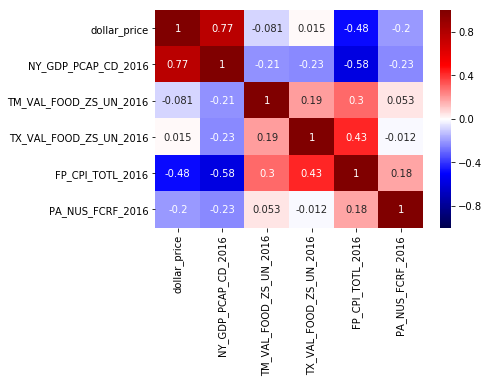

In [173]:
import seaborn as sns

sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/Users/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


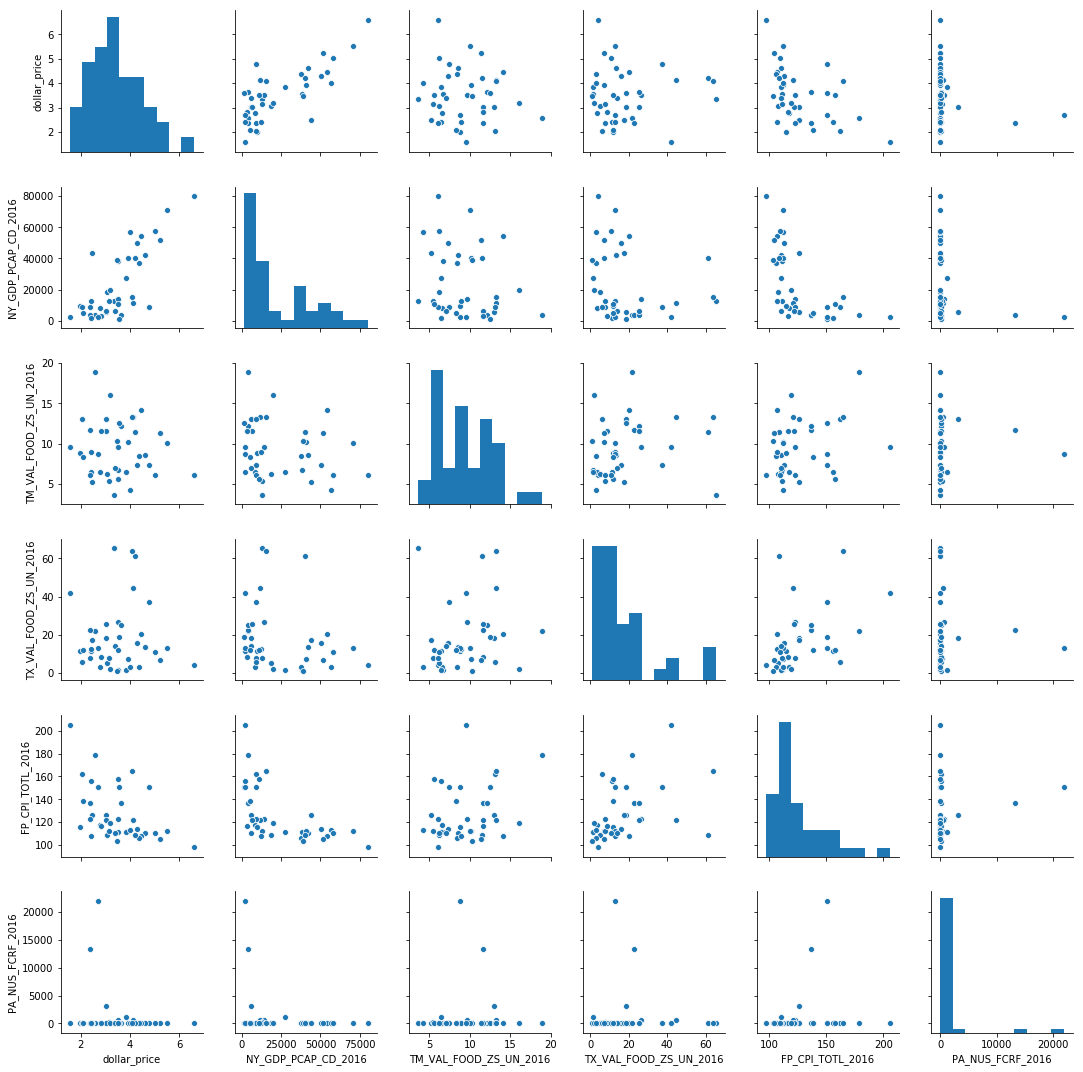

In [174]:
sns.pairplot(bmi_2016)

# From this pairplot we can see that currency exchange rate is going to be problematic due to outliers
# Thinking more about this currency exchange rate doesn't make too much sense as a predictor

### Part 4

Create an MVP regression model using these indicators

In [139]:
import statsmodels.api as sm
import patsy

In [169]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + TM_VAL_FOOD_ZS_UN_2016 + TX_VAL_FOOD_ZS_UN_2016 + FP_CPI_TOTL_2016 + PA_NUS_FCRF_2016'

In [170]:
# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     12.40
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.91e-07
Time:                        13:16:35   Log-Likelihood:                -38.488
No. Observations:                  40   AIC:                             88.98
Df Residuals:                      34   BIC:                             99.11
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.2302      0.877      3.684      0.001       1.448       5.012
NY_GDP_PCAP_CD_2016     3.587e-05    6.3e-06      5.696      0.000    2.31e-05    4.87e-05
TM_VAL_FOOD_ZS_UN_2016     0.0159      0.037      0.434      0.667      -0.058       0.090
TX_VAL_FOOD_ZS_UN_2016     0.0174      0.008      2.060      0.047       0.000       0.034
FP_CPI_TOTL_2016          -0.0079      0.006     -1.280      0.209      -0.021       0.005
PA_NUS_FCRF_2016       -8.984e-07   2.83e-05     -0.032      0.975   -5.85e-05    5.67e-05
==============================================================================
Omnibus:                        1.459   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.586
Skew:                          -0.020   Prob(JB):                        0.746
Kurtosis:                       3.592   Cond. No.                     2.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

GDP/capita and Food Exports are the only significant indicators in this model. Currency Exchange rate is very non-significant, remove this for the next model. CPI is surprisingly not important either.

### Part 5

Create a second model with better features. I want to look at whether a country is a net importer or exporter of foods. To do this I'll need to combine a few different indicators.

Lets look at:
1. GDP per Capita, current USD (NY.GDP.PCAP.CD)
2. Food Imports (TM.VAL.FOOD.ZS.UN)
3. Food Exports (TX.VAL.FOOD.ZS.UN)
4. Imports/Exports of goods and services, current USD (NE.IMP.GNFS.KN, NE.EXP.GNFS.CD)
5. External balance on goods and services, exports - imports(NE.RSB.GNFS.CD)
6. Cost to Import (IC.IMP.CSBC.CD)
7. Life Expectancy (SP.DYN.LE00.IN)

Will combine 2, 3, and 4 to create a single net food feature

In [224]:
indicators = ['NY.GDP.PCAP.CD', 'TM.VAL.FOOD.ZS.UN', 'TX.VAL.FOOD.ZS.UN',
              'NE.IMP.GNFS.KN', 'NE.EXP.GNFS.CD', 'NE.RSB.GNFS.CD', 'IC.IMP.CSBC.CD', 'SP.DYN.LE00.IN', 'SP.POP.TOTL']
years = ['2016']

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
TM_VAL_FOOD_ZS_UN_2016    54 non-null float64
TX_VAL_FOOD_ZS_UN_2016    54 non-null float64
NE_IMP_GNFS_KN_2016       51 non-null float64
NE_EXP_GNFS_CD_2016       54 non-null float64
NE_RSB_GNFS_CD_2016       53 non-null float64
IC_IMP_CSBC_CD_2016       54 non-null float64
SP_DYN_LE00_IN_2016       54 non-null float64
SP_POP_TOTL_2016          54 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.3+ KB


In [225]:
indicator_df.head()

,iso_a3,NY_GDP_PCAP_CD_2016,TM_VAL_FOOD_ZS_UN_2016,TX_VAL_FOOD_ZS_UN_2016,NE_IMP_GNFS_KN_2016,NE_EXP_GNFS_CD_2016,NE_RSB_GNFS_CD_2016,IC_IMP_CSBC_CD_2016,SP_DYN_LE00_IN_2016,SP_POP_TOTL_2016
0,PAK,1368.454326,12.509465,18.587081,1.779230e+12,2.548499e+10,-1.954700e+10,496.300000,66.481000,203627284.0
1,BRA,8712.887044,7.400880,37.290676,4.105132e+11,2.240118e+11,7.181714e+09,821.700000,75.509000,206163058.0
2,BHR,22619.116672,12.041872,2.563337,7.739610e+09,2.378218e+10,2.694149e+09,397.000000,76.900000,1425791.0
3,EMU,35180.749579,10.271782,10.132771,NaN,5.471491e+12,NaN,43.052632,81.945912,340616924.0
4,CHL,13748.088395,9.617076,26.443254,4.214220e+13,7.049547e+10,1.525717e+09,290.000000,79.522000,18209068.0


In [226]:
# Impute missing values as median

indicator_df['NE_IMP_GNFS_KN_2016'].fillna(indicator_df['NE_IMP_GNFS_KN_2016'].median(), inplace = True)
indicator_df['NE_RSB_GNFS_CD_2016'].fillna(indicator_df['NE_RSB_GNFS_CD_2016'].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
TM_VAL_FOOD_ZS_UN_2016    54 non-null float64
TX_VAL_FOOD_ZS_UN_2016    54 non-null float64
NE_IMP_GNFS_KN_2016       54 non-null float64
NE_EXP_GNFS_CD_2016       54 non-null float64
NE_RSB_GNFS_CD_2016       54 non-null float64
IC_IMP_CSBC_CD_2016       54 non-null float64
SP_DYN_LE00_IN_2016       54 non-null float64
SP_POP_TOTL_2016          54 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.3+ KB


In [227]:
bmi_2016 = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]

# Drop Taiwan for now since we don't have worldbank data

bmi_2016.drop(bmi_2016[bmi_2016['name'] == 'Taiwan'].index, inplace = True)
bmi_2016 = bmi_2016.reset_index().drop('index', axis = 1)

# Merge indicator_df

bmi_2016 = bmi_2016.merge(indicator_df, how = 'left', on = 'iso_a3')

In [228]:
bmi_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 14 columns):
date                      42 non-null object
iso_a3                    42 non-null object
currency_code             42 non-null object
name                      42 non-null object
dollar_price              42 non-null float64
NY_GDP_PCAP_CD_2016       42 non-null float64
TM_VAL_FOOD_ZS_UN_2016    42 non-null float64
TX_VAL_FOOD_ZS_UN_2016    42 non-null float64
NE_IMP_GNFS_KN_2016       42 non-null float64
NE_EXP_GNFS_CD_2016       42 non-null float64
NE_RSB_GNFS_CD_2016       42 non-null float64
IC_IMP_CSBC_CD_2016       42 non-null float64
SP_DYN_LE00_IN_2016       42 non-null float64
SP_POP_TOTL_2016          42 non-null float64
dtypes: float64(10), object(4)
memory usage: 4.9+ KB


In [229]:
bmi_2016['net_food'] = (bmi_2016['TX_VAL_FOOD_ZS_UN_2016'] * bmi_2016['NE_EXP_GNFS_CD_2016'] - bmi_2016['TM_VAL_FOOD_ZS_UN_2016'] * bmi_2016['NE_IMP_GNFS_KN_2016']) / 100

In [230]:
bmi_2016.describe()

,dollar_price,NY_GDP_PCAP_CD_2016,TM_VAL_FOOD_ZS_UN_2016,TX_VAL_FOOD_ZS_UN_2016,NE_IMP_GNFS_KN_2016,NE_EXP_GNFS_CD_2016,NE_RSB_GNFS_CD_2016,IC_IMP_CSBC_CD_2016,SP_DYN_LE00_IN_2016,SP_POP_TOTL_2016,net_food
count,42.000000,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,4.200000e+01,4.200000e+01
mean,3.510810,23382.706210,9.349126,17.294702,1.558961e+14,4.537147e+11,2.596770e+09,371.008396,77.093940,1.311542e+08,-1.464533e+13
std,1.057161,21507.975636,3.341453,16.573320,6.138969e+14,9.222738e+11,9.737495e+10,272.005743,5.130658,2.888678e+08,5.734989e+13
min,1.572581,1368.454326,3.642440,0.902413,7.669681e+10,1.128966e+10,-5.205700e+11,0.000000,62.774000,3.424132e+06,-3.095977e+14
25%,2.714253,6035.301316,6.512261,6.939024,5.858493e+11,7.429181e+10,-1.597298e+10,181.500000,75.058250,9.841288e+06,-5.151688e+11
50%,3.499615,12814.913509,8.877964,12.295995,9.512178e+11,1.965238e+11,2.283866e+09,311.000000,77.187000,4.078023e+07,-8.763062e+10
75%,4.183706,39718.721882,11.626027,21.398938,6.335244e+12,4.297034e+11,1.979256e+10,551.750000,81.862544,1.013597e+08,-6.309845e+09
max,6.591624,80037.503040,18.868116,65.214364,3.543103e+15,5.471491e+12,2.554835e+11,1200.000000,84.226829,1.378665e+09,4.836224e+11


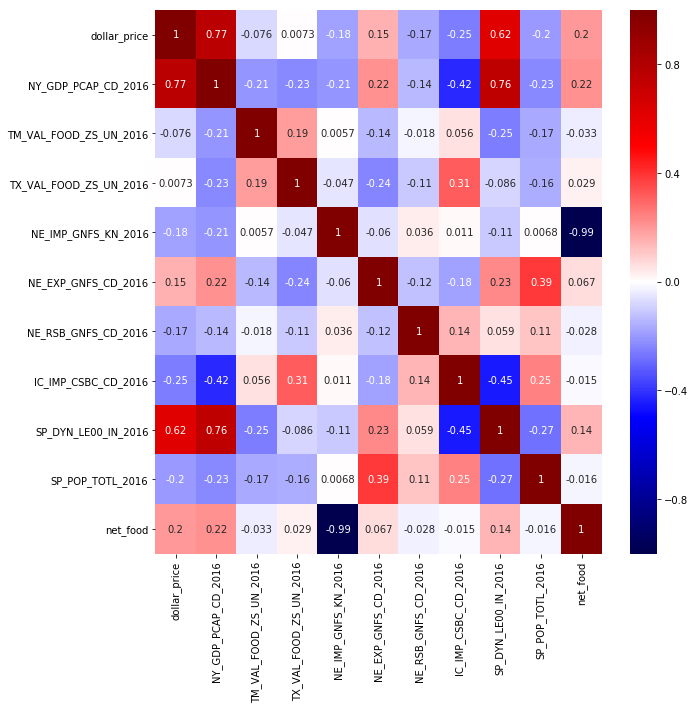

In [231]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

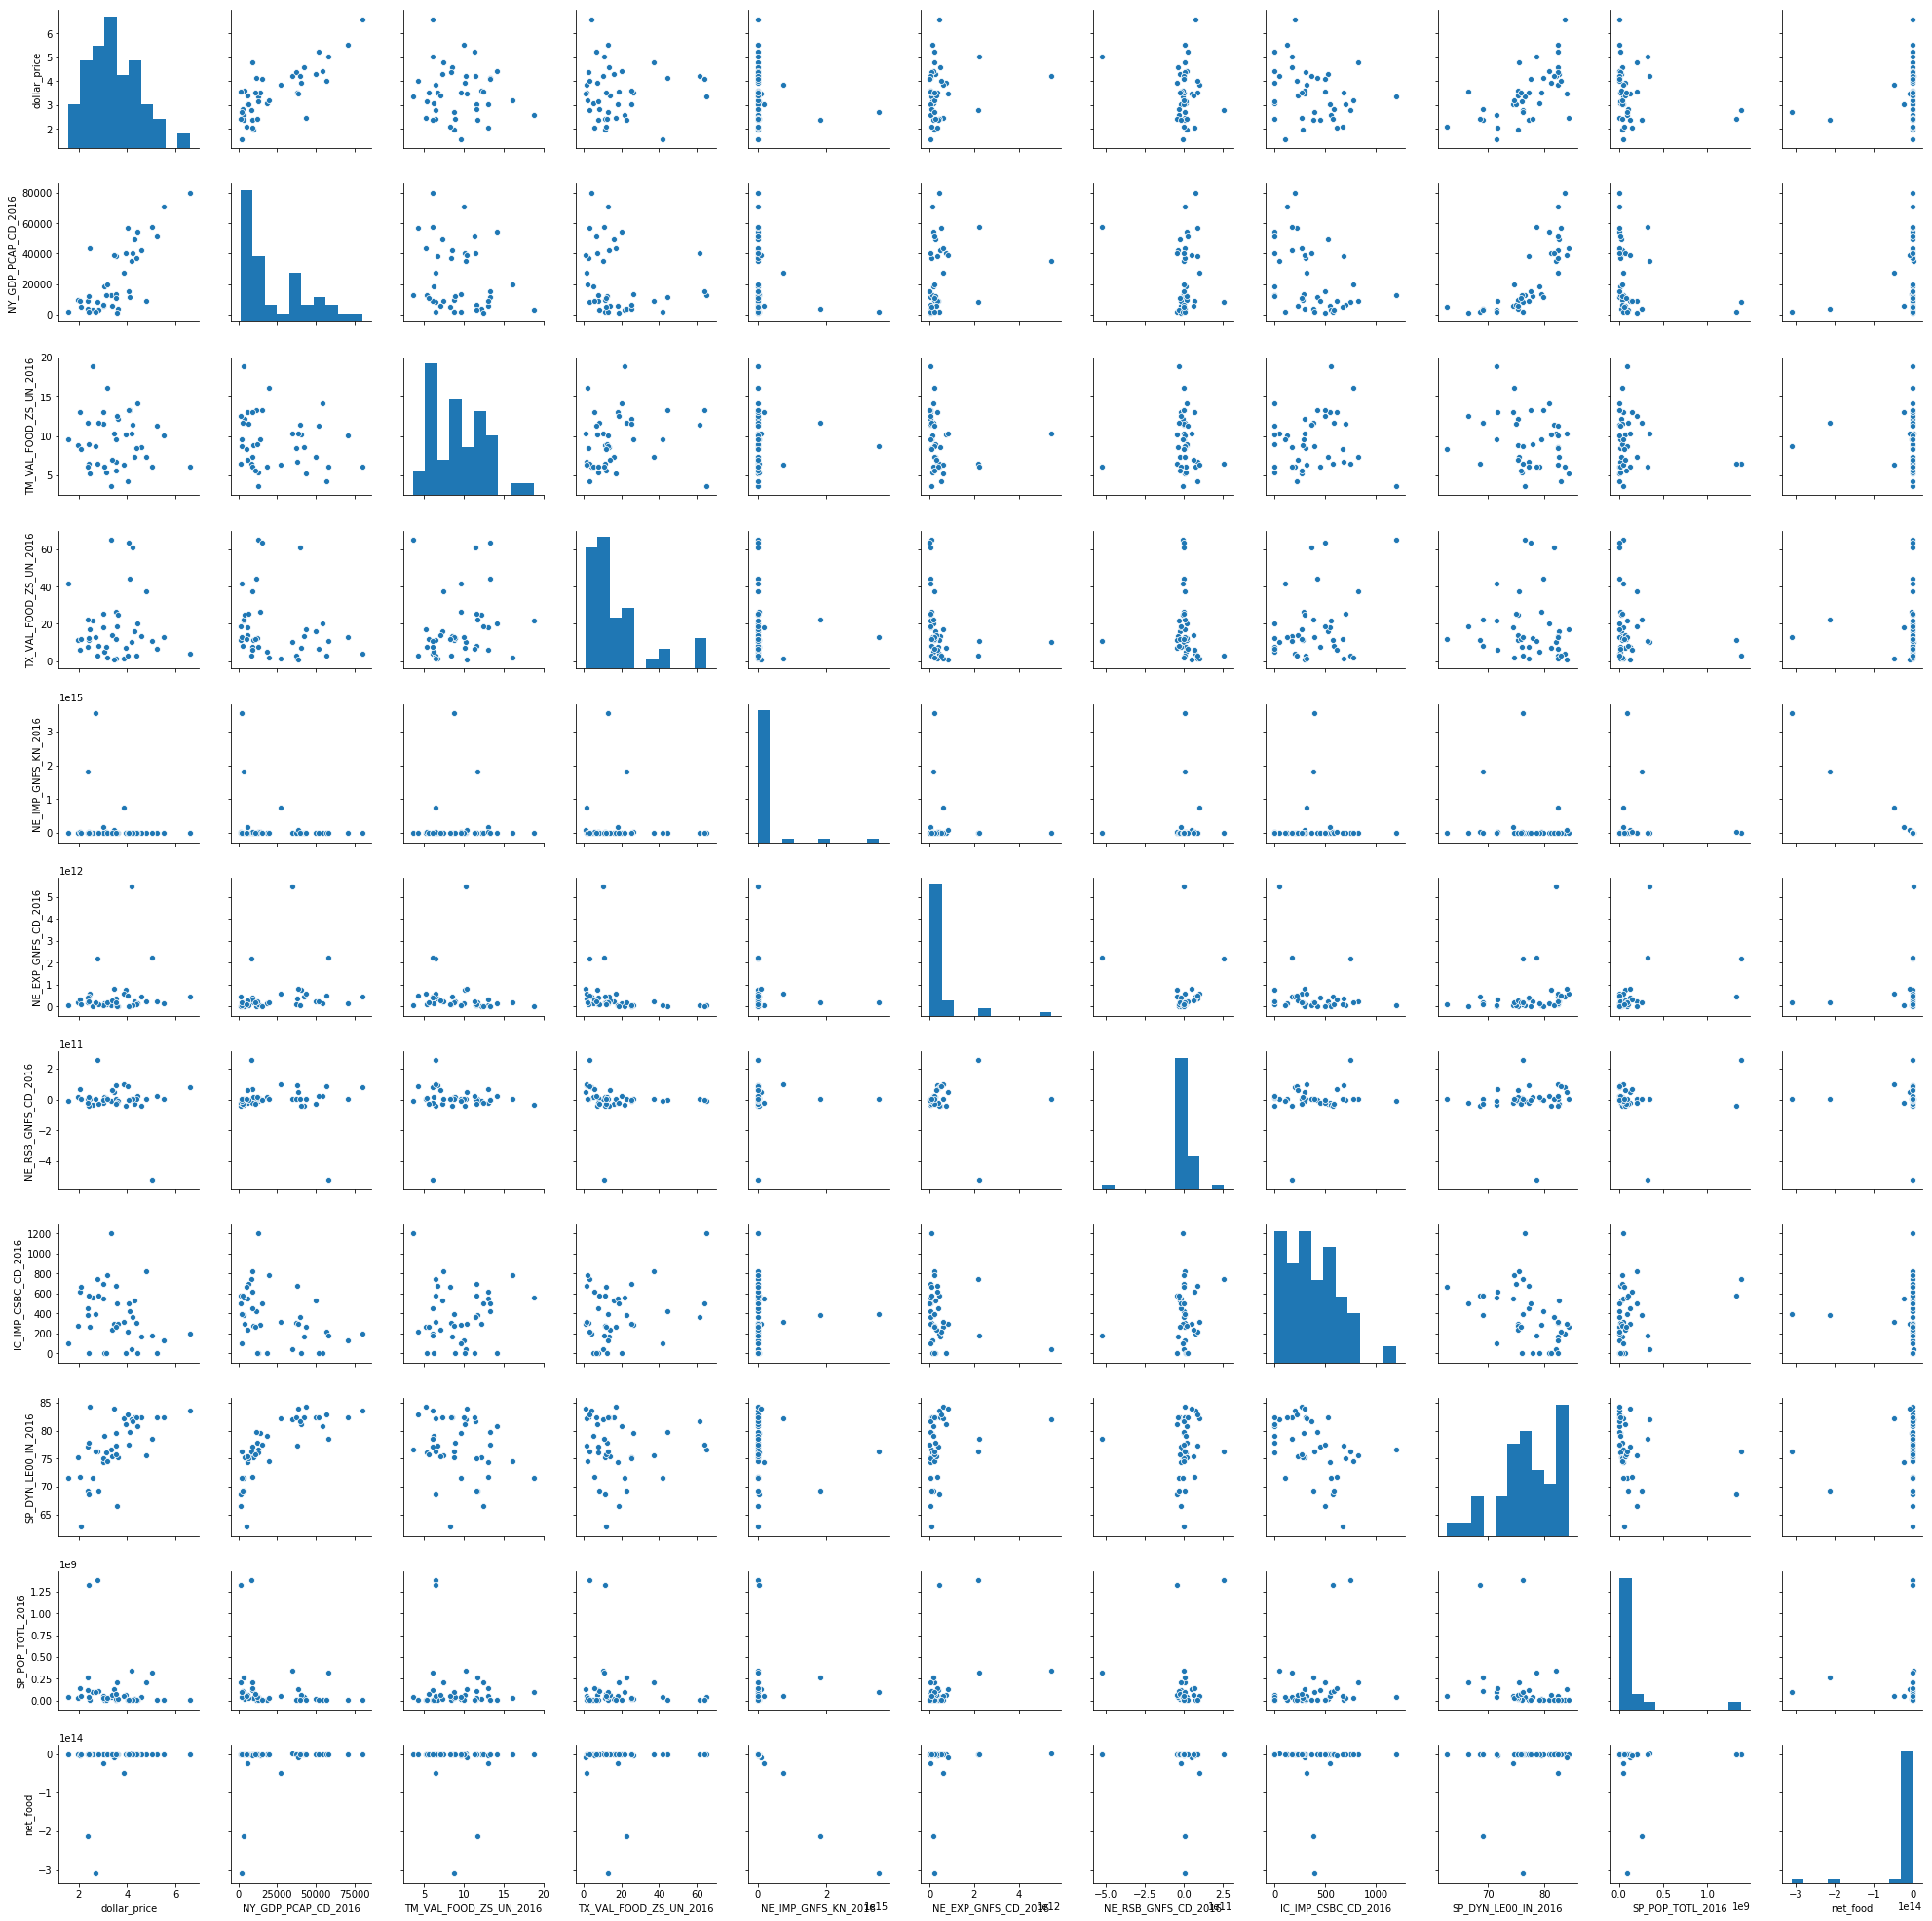

In [232]:
sns.pairplot(bmi_2016)

Data Key
1. GDP per Capita, current USD (NY.GDP.PCAP.CD)
2. Food Imports (TM.VAL.FOOD.ZS.UN)
3. Food Exports (TX.VAL.FOOD.ZS.UN)
4. Imports/Exports of goods and services, current USD (NE.IMP.GNFS.KN, NE.EXP.GNFS.CD)
5. External balance on goods and services, exports - imports(NE.RSB.GNFS.CD)
6. Cost to Import (IC.IMP.CSBC.CD)
7. Life Expectancy (SP.DYN.LE00.IN)

From pair plots we can see there are some huge outliers for 4. and 5.  
From the heatmap we can see a very strong negative correlation between total imports and net food, probably due to outliers

In [223]:
# Top importers are COL, IDN, KOR, and VNM by huge margins. Not sure how this is possible?
# Top exporters are CHN, EMU, and USA which seems reasonable.
# Trade surplus / defecit is fairly normal, CHN very large and USA very low.

# For imports, reset outliers to median
# Net Food metric should be normalized by population into a per capita metric, same for trade surplus / defecit

In [236]:
iqr = bmi_2016.describe().loc['75%','NE_IMP_GNFS_KN_2016'] - bmi_2016.describe().loc['25%','NE_IMP_GNFS_KN_2016']
median = bmi_2016.describe().loc['50%','NE_IMP_GNFS_KN_2016']
print(iqr, median)

5749394220275.0 951217790750.0


In [242]:
bmi_2016[bmi_2016['NE_IMP_GNFS_KN_2016'] > 5 * iqr]

# 6 values for imports lie 5x outside iqr

,date,iso_a3,currency_code,name,dollar_price,NY_GDP_PCAP_CD_2016,TM_VAL_FOOD_ZS_UN_2016,TX_VAL_FOOD_ZS_UN_2016,NE_IMP_GNFS_KN_2016,NE_EXP_GNFS_CD_2016,NE_RSB_GNFS_CD_2016,IC_IMP_CSBC_CD_2016,SP_DYN_LE00_IN_2016,SP_POP_TOTL_2016,net_food
6,2016-07-01,CHL,CLP,Chile,3.532375,13748.088395,9.617076,26.443254,4.214220e+13,7.049547e+10,1.525717e+09,290.0,79.522000,18209068.0,-4.034206e+12
8,2016-07-01,COL,COP,Colombia,3.038580,5871.223524,13.038563,18.326248,1.762790e+14,4.162375e+10,-1.914266e+10,545.0,74.381000,48171392.0,-2.297662e+13
17,2016-07-01,IDN,IDR,Indonesia,2.364156,3562.845756,11.672274,22.489825,1.818133e+15,1.778860e+11,7.051012e+09,382.6,69.191000,261554226.0,-2.121775e+14
20,2016-07-01,JPN,JPY,Japan,3.466854,38794.330941,10.331385,0.902413,8.396261e+13,8.007195e+11,4.878168e+10,299.2,83.984878,126994511.0,-8.667274e+12
21,2016-07-01,KOR,KRW,South Korea,3.856435,27608.247429,6.421986,1.406422,7.558610e+14,5.982386e+11,9.699290e+10,315.0,82.275610,51245707.0,-4.853288e+13
40,2016-07-01,VNM,VND,Vietnam,2.690583,2192.214539,8.738736,12.871823,3.543103e+15,1.921876e+11,5.258354e+09,392.0,76.253000,93638724.0,-3.095977e+14


In [244]:
imports = list(bmi_2016['NE_IMP_GNFS_KN_2016'])
adj_imports = []
for value in imports:
    if value > 5 * iqr:
        adj_imports.append(median)
    else:
        adj_imports.append(value)

bmi_2016['NE_IMP_GNFS_KN_2016'] = adj_imports

In [247]:
food_exp = bmi_2016['TX_VAL_FOOD_ZS_UN_2016'] * bmi_2016['NE_EXP_GNFS_CD_2016']
food_imp = bmi_2016['TM_VAL_FOOD_ZS_UN_2016'] * bmi_2016['NE_IMP_GNFS_KN_2016']

bmi_2016['net_food'] = (food_exp - food_imp) / (bmi_2016['SP_POP_TOTL_2016'] * 100)

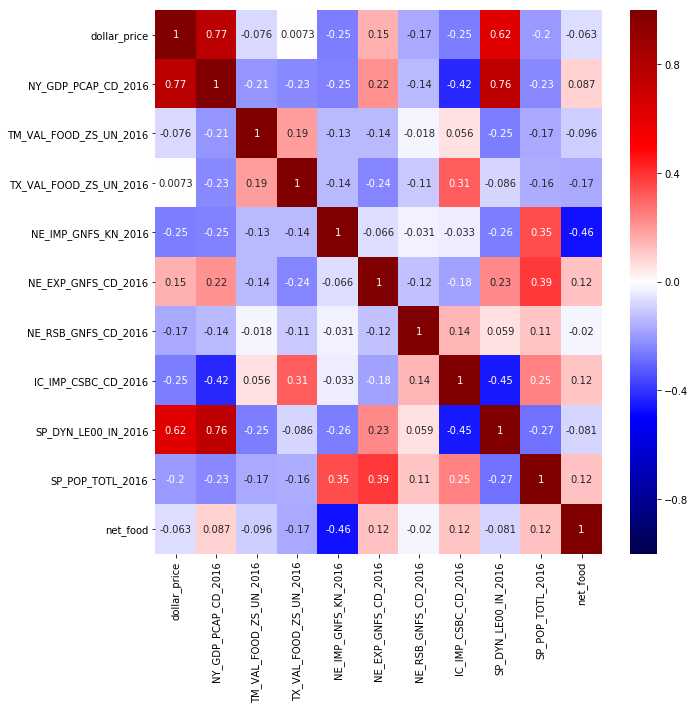

In [248]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

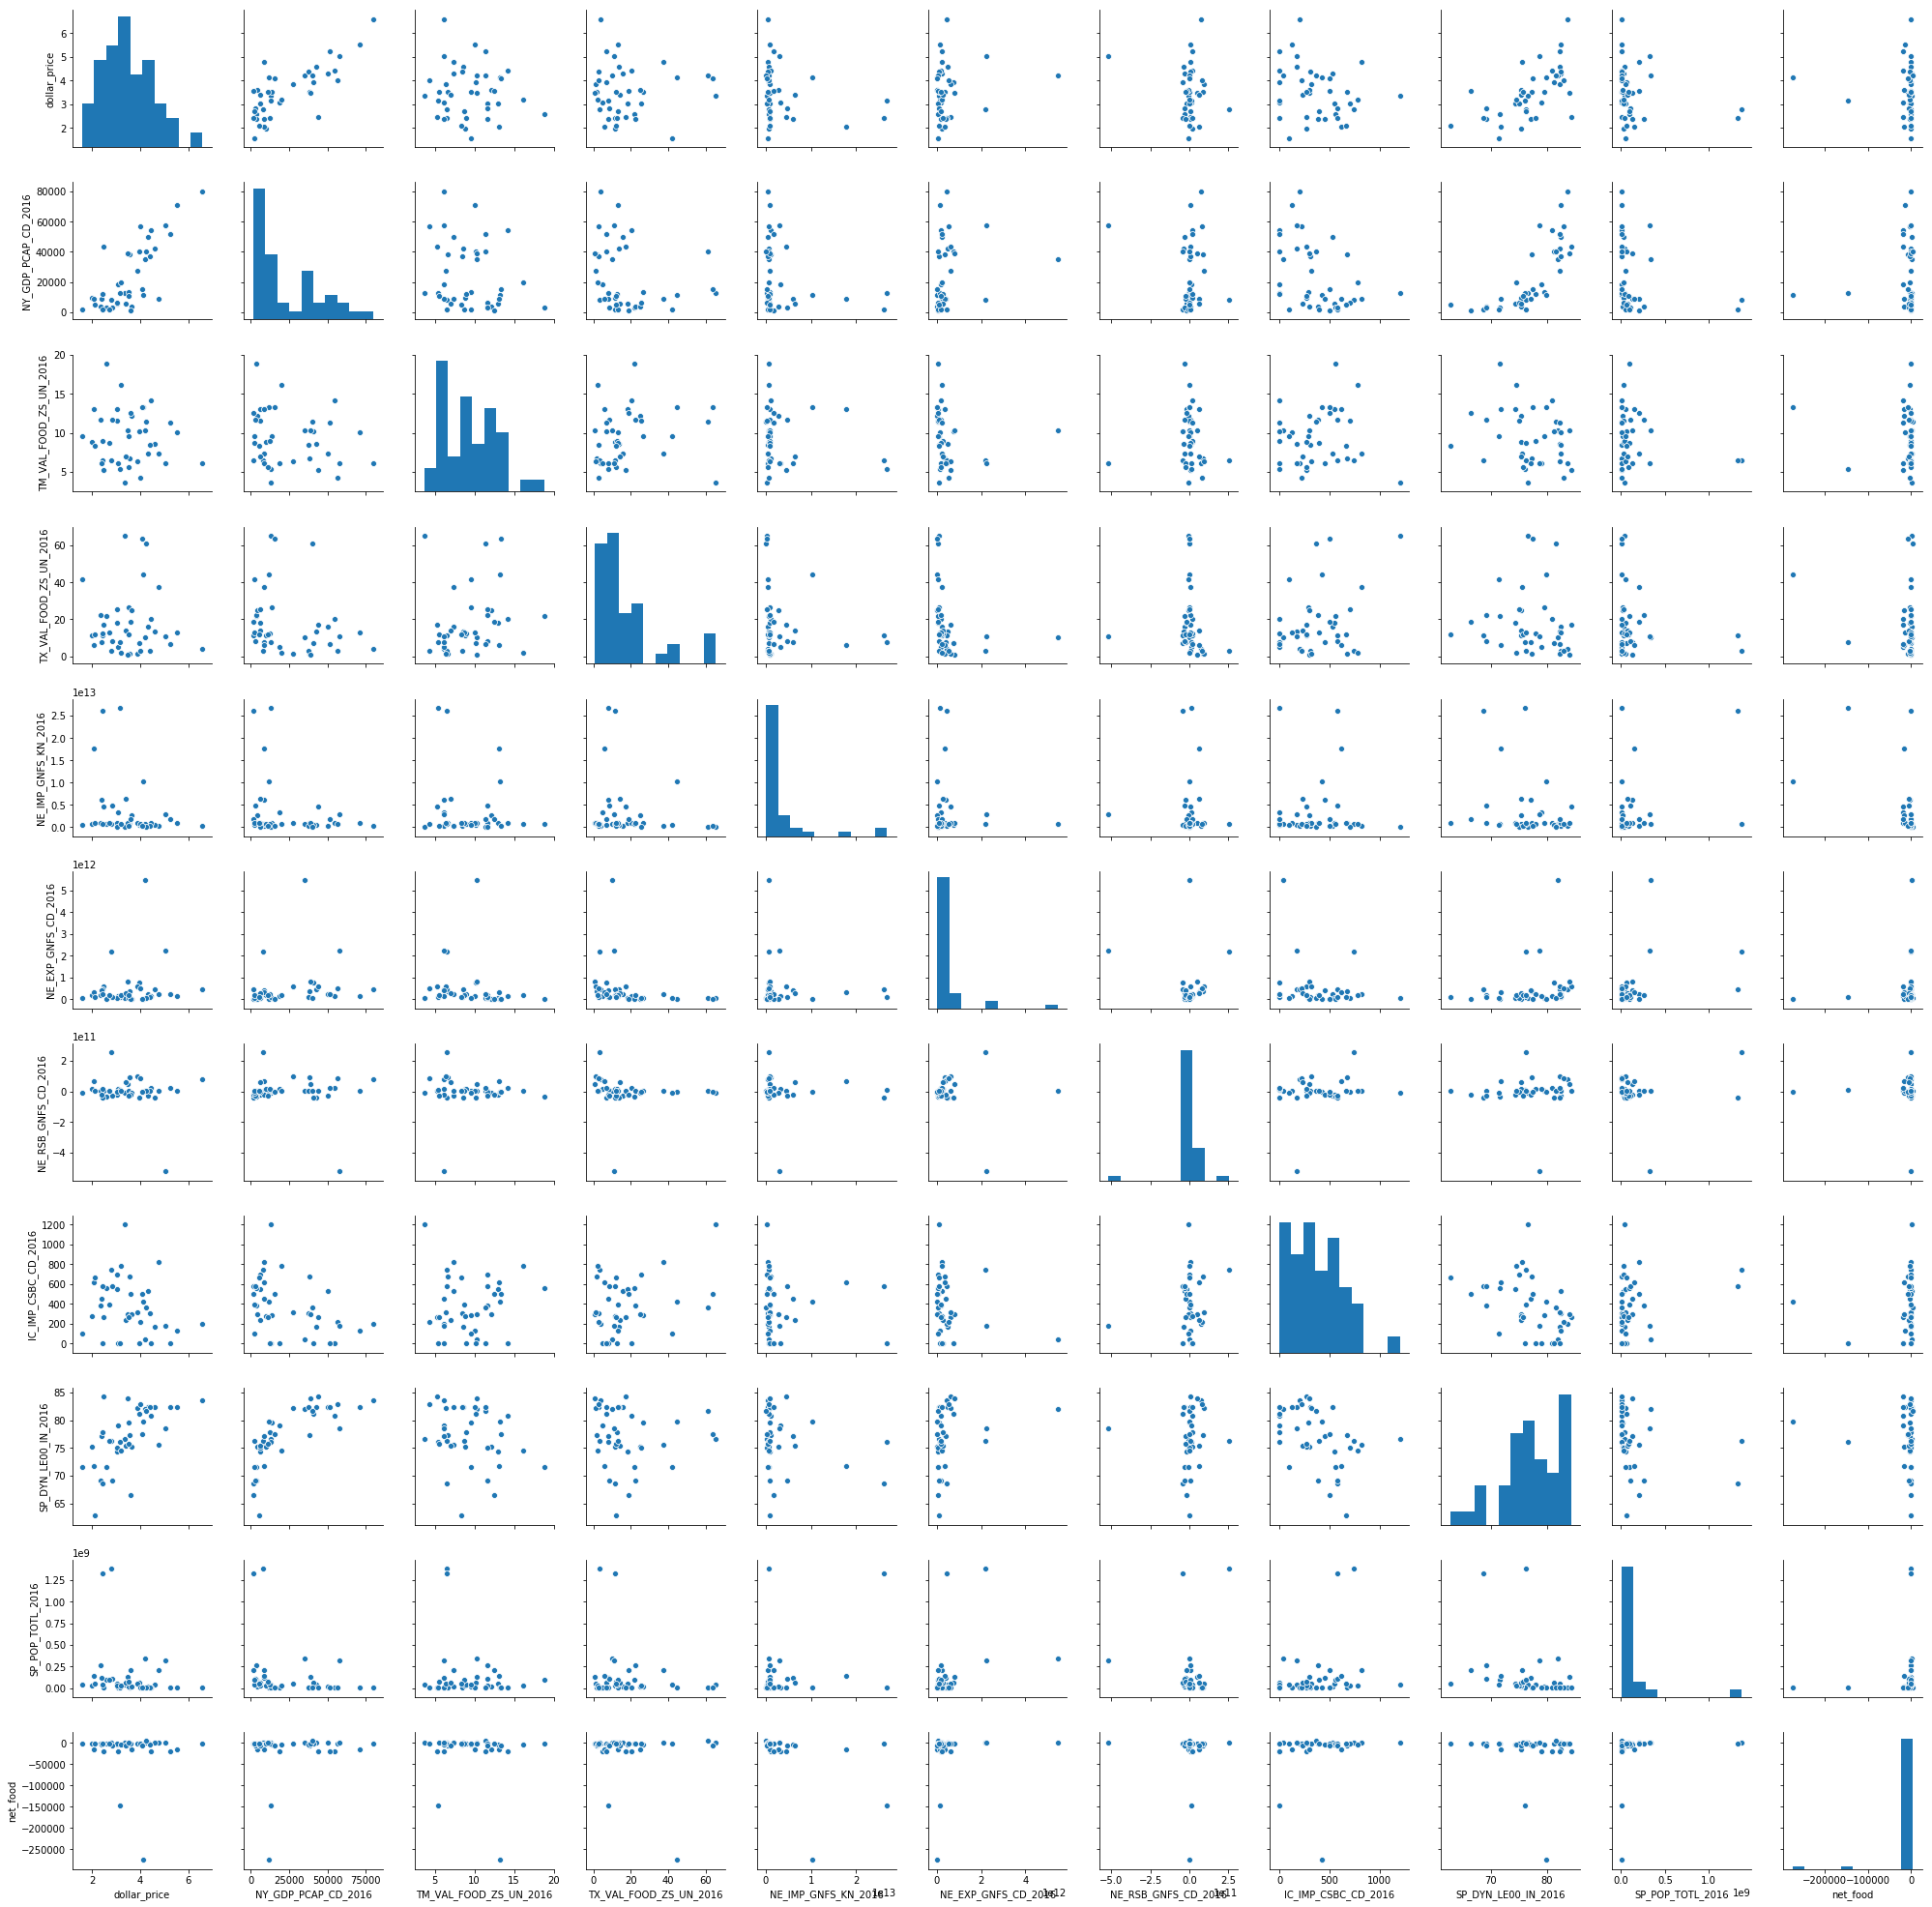

In [249]:
sns.pairplot(bmi_2016)

In [250]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + NE_RSB_GNFS_CD_2016 + IC_IMP_CSBC_CD_2016 + SP_DYN_LE00_IN_2016 + net_food'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     12.21
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.84e-07
Time:                        16:36:16   Log-Likelihood:                -40.593
No. Observations:                  42   AIC:                             93.19
Df Residuals:                      36   BIC:                             103.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3311      2.588      0.128      0.899      -4.917       5.579
NY_GDP_PCAP_CD_2016   3.57e-05   8.23e-06      4.339      0.000     1.9e-05    5.24e-05
NE_RSB_GNFS_CD_2016 -1.083e-12   1.17e-12     -0.929      0.359   -3.45e-12    1.28e-12
IC_IMP_CSBC_CD_2016     0.0006      0.000      1.229      0.227      -0.000       0.001
SP_DYN_LE00_IN_2016     0.0272      0.035      0.782      0.439      -0.043       0.098
net_food            -3.007e-06   2.36e-06     -1.272      0.211    -7.8e-06    1.79e-06
==============================================================================
Omnibus:                        2.601   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.753
Skew:                          -0.068   Prob(JB):                        0.416
Kurtosis:                       3.992   Cond. No.                     2.35e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that R-squared is actually a bit worse than the previous model, probably because I removed food exports which was one of the significant features from the previous model. As of now GDP per capita is the only significant predictor! My net_food feature, trade surplus/defecit, life expectancy, and cost to import are all not especially significant.  
  
It would seem that the best way to get a good fit is to use indicators which describe the wealth of a population.

### Part 6

Create a third model using indicators which describe wealth

Look at:
1. GDP per Capita, current USD (NY.GDP.PCAP.CD)
2. Urban Population % (SP.URB.TOTL.IN.ZS)
3. Infant mortality rate (SP.DYN.IMRT.IN)
4. Consumer Price Index (FP.CPI.TOTL)


In [273]:
indicators = ['NY.GDP.PCAP.CD', 'SP.URB.TOTL.IN.ZS', 'SP.DYN.IMRT.IN', 'FP.CPI.TOTL']
years = ['2016']

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
SP_URB_TOTL_IN_ZS_2016    54 non-null float64
SP_DYN_IMRT_IN_2016       53 non-null float64
FP_CPI_TOTL_2016          52 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


In [274]:
indicator_df['SP_DYN_IMRT_IN_2016'].fillna(indicator_df['SP_DYN_IMRT_IN_2016'].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
SP_URB_TOTL_IN_ZS_2016    54 non-null float64
SP_DYN_IMRT_IN_2016       54 non-null float64
FP_CPI_TOTL_2016          52 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


In [275]:
bmi_2016 = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]

# Drop Taiwan for now since we don't have worldbank data

bmi_2016.drop(bmi_2016[bmi_2016['name'] == 'Taiwan'].index, inplace = True)
bmi_2016 = bmi_2016.reset_index().drop('index', axis = 1)

# Merge indicator_df

bmi_2016 = bmi_2016.merge(indicator_df, how = 'left', on = 'iso_a3')

In [276]:
bmi_2016.head()

,date,iso_a3,currency_code,name,dollar_price,NY_GDP_PCAP_CD_2016,SP_URB_TOTL_IN_ZS_2016,SP_DYN_IMRT_IN_2016,FP_CPI_TOTL_2016
0,2016-07-01,ARE,AED,UAE,3.539245,38141.846759,85.965,7.7,111.115726
1,2016-07-01,ARG,ARS,Argentina,3.347841,12790.242473,91.627,9.7,NaN
2,2016-07-01,AUS,AUD,Australia,4.304738,50019.967768,85.800,3.1,113.475546
3,2016-07-01,BRA,BRL,Brazil,4.781811,8712.887044,86.042,14.6,150.482602
4,2016-07-01,CAN,CAD,Canada,4.604758,42279.900823,81.300,4.6,110.224671


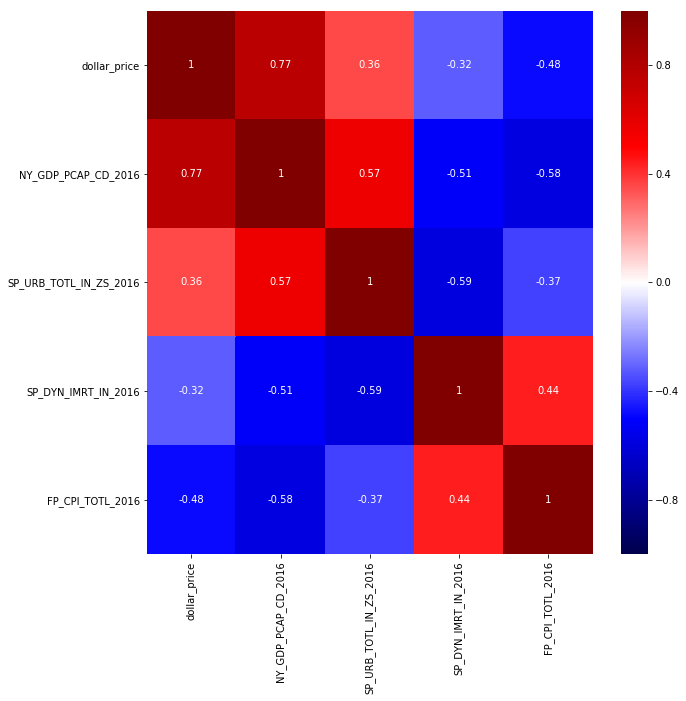

In [277]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/Users/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


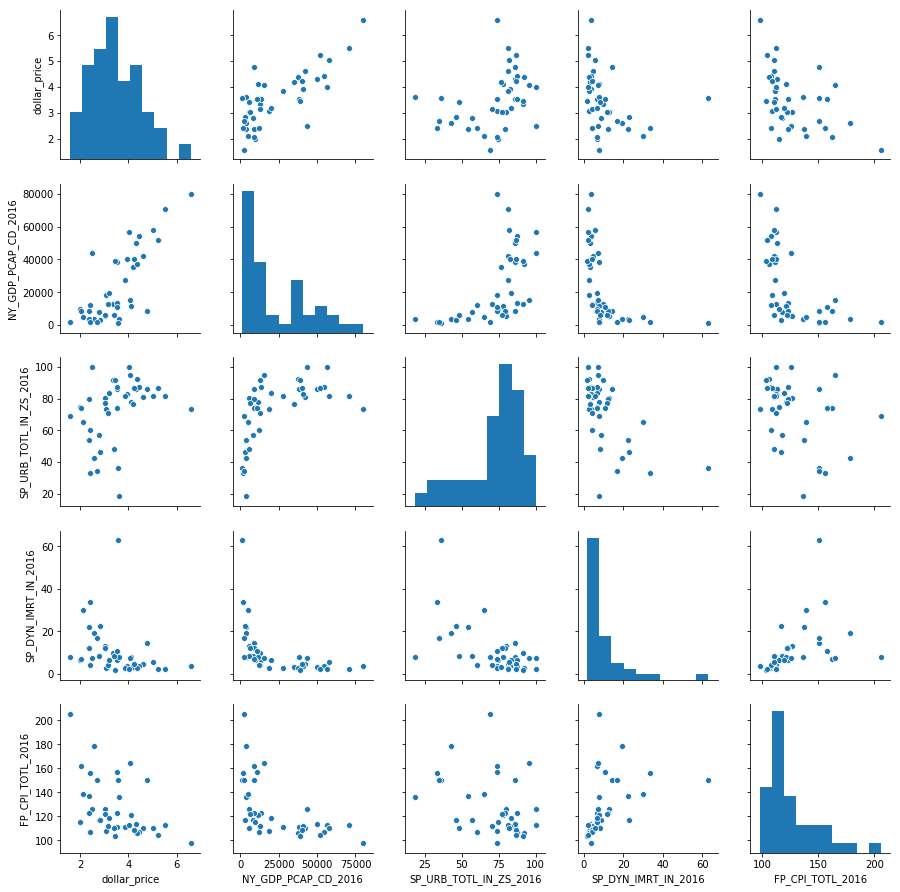

In [278]:
sns.pairplot(bmi_2016);

In [280]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + SP_URB_TOTL_IN_ZS_2016 + SP_DYN_IMRT_IN_2016 + FP_CPI_TOTL_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.44
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.83e-07
Time:                        17:40:22   Log-Likelihood:                -40.639
No. Observations:                  40   AIC:                             91.28
Df Residuals:                      35   BIC:                             99.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.3000      1.003      3.291      0.002       1.264       5.336
NY_GDP_PCAP_CD_2016     4.052e-05   7.45e-06      5.441      0.000    2.54e-05    5.56e-05
SP_URB_TOTL_IN_ZS_2016    -0.0054      0.008     -0.684      0.498      -0.022       0.011
SP_DYN_IMRT_IN_2016        0.0079      0.013      0.600      0.552      -0.019       0.035
FP_CPI_TOTL_2016          -0.0035      0.006     -0.569      0.573      -0.016       0.009
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.366
Skew:                           0.378   Prob(JB):                        0.306
Kurtosis:                       3.921   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Still looks like GDP per capita is the only significant predictor. Also R^2 and Adjusted R^2 have decreased.

### Part 7

For the fourth model try inputing:
1. GDP per Capita (NY.GDP.PCAP.CD)
2. GNI per Capita (NY.GNP.PCAP.CD), might be too co-linear with GDP per Capita
3. Economic Growth Rate, GDP per Capita Growth, annual % (NY.GDP.PCAP.KD.ZG)
4. Price level ratio of PPP conversion factor (GDP) to market exchange rate (PA.NUS.PPPC.RF)
5. Real Interest Rate % (FR.INR.RINR)

In [281]:
indicators = ['NY.GDP.PCAP.CD', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.KD.ZG', 'PA.NUS.PPPC.RF', 'FR.INR.RINR']
years = ['2016']

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
NY_GNP_PCAP_CD_2016       54 non-null float64
NY_GDP_PCAP_KD_ZG_2016    54 non-null float64
PA_NUS_PPPC_RF_2016       53 non-null float64
FR_INR_RINR_2016          43 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


In [282]:
# There are some null valeus here but not too many. Lets replace them with median values.

indicator_df['PA_NUS_PPPC_RF_2016'].fillna(indicator_df['PA_NUS_PPPC_RF_2016'].median(), inplace = True)
indicator_df['FR_INR_RINR_2016'].fillna(indicator_df['FR_INR_RINR_2016'].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
iso_a3                    54 non-null object
NY_GDP_PCAP_CD_2016       54 non-null float64
NY_GNP_PCAP_CD_2016       54 non-null float64
NY_GDP_PCAP_KD_ZG_2016    54 non-null float64
PA_NUS_PPPC_RF_2016       54 non-null float64
FR_INR_RINR_2016          54 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


In [283]:
bmi_2016 = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]

# Drop Taiwan for now since we don't have worldbank data

bmi_2016.drop(bmi_2016[bmi_2016['name'] == 'Taiwan'].index, inplace = True)
bmi_2016 = bmi_2016.reset_index().drop('index', axis = 1)

# Merge indicator_df

bmi_2016 = bmi_2016.merge(indicator_df, how = 'left', on = 'iso_a3')

In [284]:
bmi_2016.head()

,date,iso_a3,currency_code,name,dollar_price,NY_GDP_PCAP_CD_2016,NY_GNP_PCAP_CD_2016,NY_GDP_PCAP_KD_ZG_2016,PA_NUS_PPPC_RF_2016,FR_INR_RINR_2016
0,2016-07-01,ARE,AED,UAE,3.539245,38141.846759,40550.0,1.909377,0.526922,4.529160
1,2016-07-01,ARG,ARS,Argentina,3.347841,12790.242473,12220.0,-3.110064,0.635369,-10.770583
2,2016-07-01,AUS,AUD,Australia,4.304738,50019.967768,54190.0,1.252830,1.056341,5.947035
3,2016-07-01,BRA,BRL,Brazil,4.781811,8712.887044,8930.0,-4.098702,0.568298,40.703042
4,2016-07-01,CAN,CAD,Canada,4.604758,42279.900823,43940.0,-0.037881,0.939310,1.880788


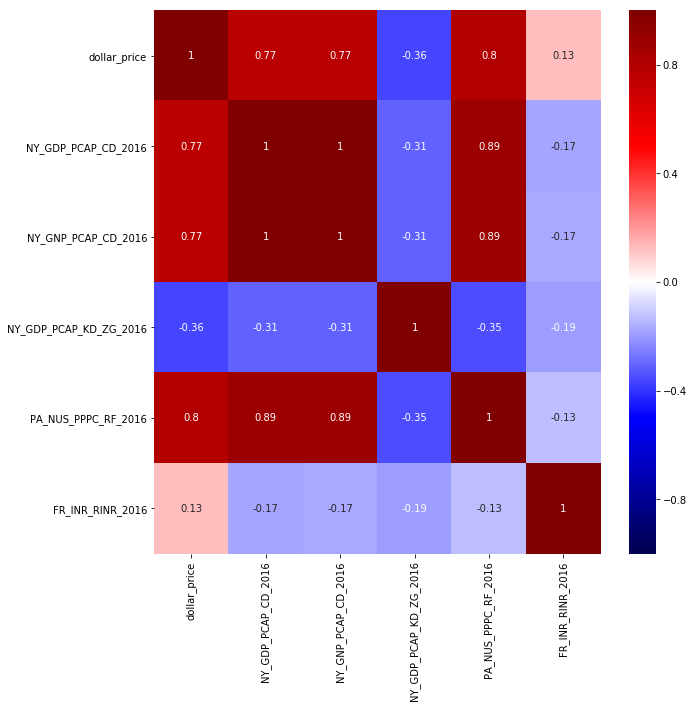

In [285]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

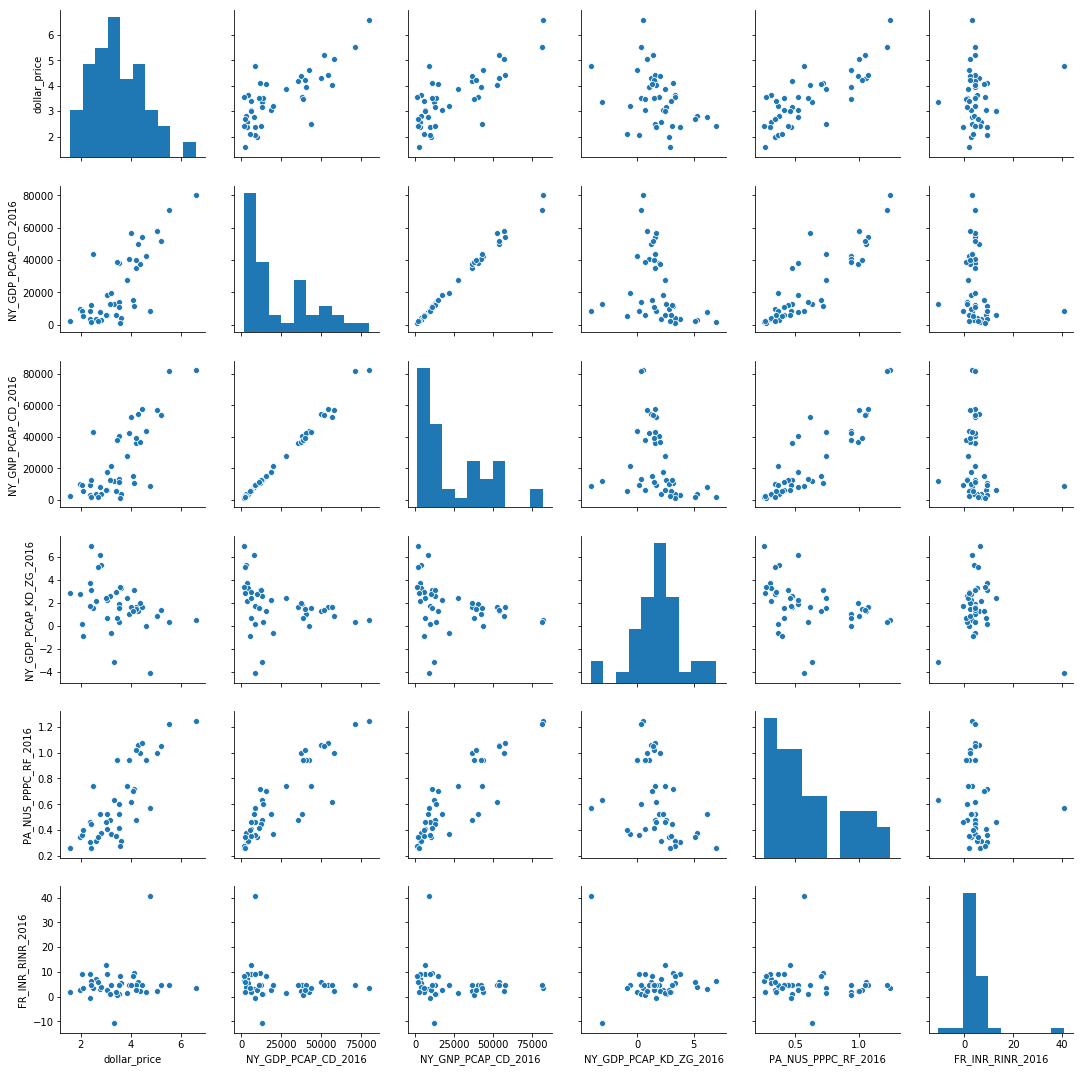

In [286]:
sns.pairplot(bmi_2016);

In [288]:
# As suspected GDP and GNI are almost perfectly co-linear. Lets take out GNI.
# Price level ratio of PPP conversion factor seems to be a decent feature. 
# Per capita growth rate % has a weak correlation to BMI, lets try multiplying it with GDP per Capita to get total growth per capita.
# Interest rate shows no correlation to BMI. lets just remove it.

bmi_2016.drop(columns = ['NY_GNP_PCAP_CD_2016', 'FR_INR_RINR_2016'], inplace = True)


In [298]:
bmi_2016['TOT_GDP_PCAP_G_2016'] = (bmi_2016['NY_GDP_PCAP_CD_2016'] * bmi_2016['NY_GDP_PCAP_KD_ZG_2016'])/100
bmi_2016.head()

,date,iso_a3,currency_code,name,dollar_price,NY_GDP_PCAP_CD_2016,NY_GDP_PCAP_KD_ZG_2016,PA_NUS_PPPC_RF_2016,TOT_GDP_PCAP_G_2016
0,2016-07-01,ARE,AED,UAE,3.539245,38141.846759,1.909377,0.526922,728.271561
1,2016-07-01,ARG,ARS,Argentina,3.347841,12790.242473,-3.110064,0.635369,-397.784714
2,2016-07-01,AUS,AUD,Australia,4.304738,50019.967768,1.252830,1.056341,626.665321
3,2016-07-01,BRA,BRL,Brazil,4.781811,8712.887044,-4.098702,0.568298,-357.115298
4,2016-07-01,CAN,CAD,Canada,4.604758,42279.900823,-0.037881,0.939310,-16.016103


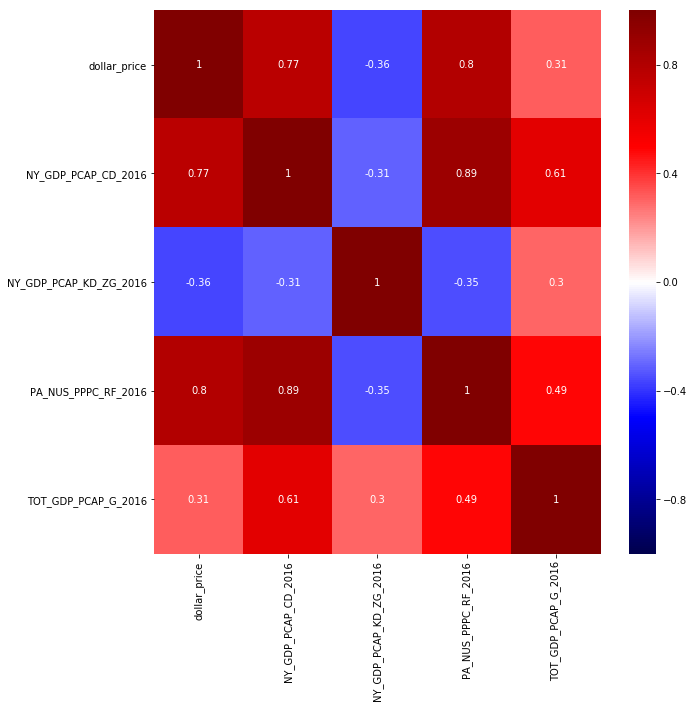

In [299]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

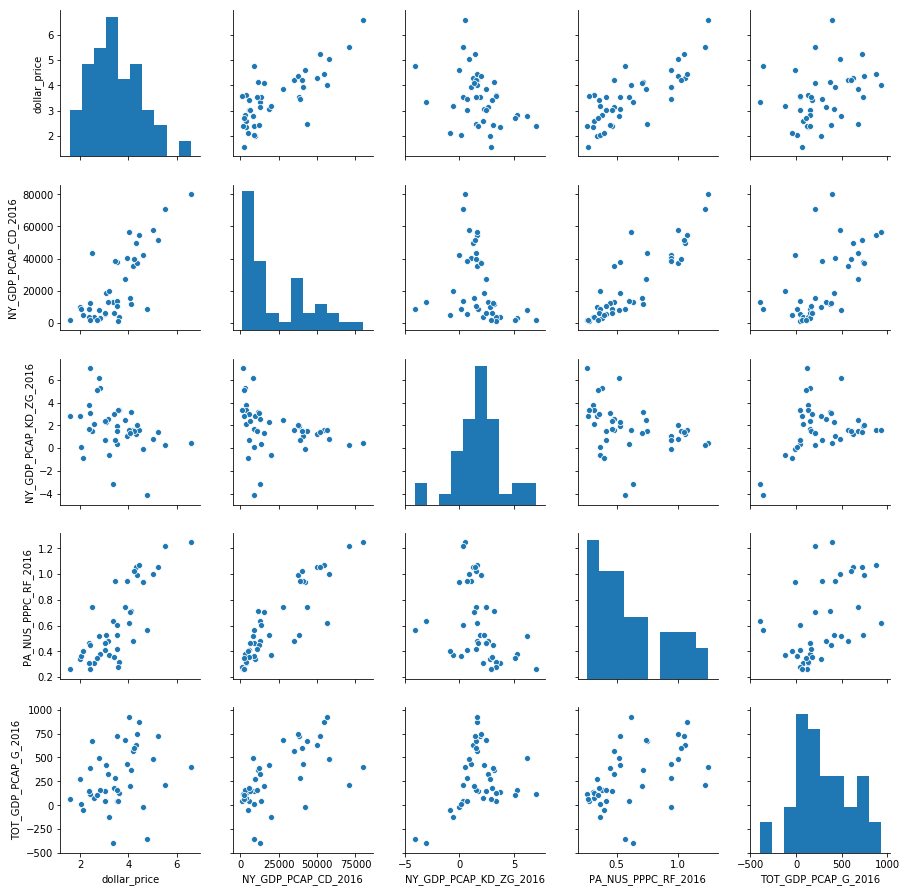

In [300]:
sns.pairplot(bmi_2016);

In [301]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + NY_GDP_PCAP_KD_ZG_2016 + PA_NUS_PPPC_RF_2016 + TOT_GDP_PCAP_G_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     19.92
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.08e-09
Time:                        14:17:19   Log-Likelihood:                -37.306
No. Observations:                  42   AIC:                             84.61
Df Residuals:                      37   BIC:                             93.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.0405      0.332      6.149      0.000       1.368       2.713
NY_GDP_PCAP_CD_2016     2.232e-05   1.16e-05      1.925      0.062   -1.18e-06    4.58e-05
NY_GDP_PCAP_KD_ZG_2016     0.0118      0.066      0.180      0.858      -0.121       0.145
PA_NUS_PPPC_RF_2016        1.8619      0.735      2.534      0.016       0.373       3.351
TOT_GDP_PCAP_G_2016       -0.0008      0.001     -1.444      0.157      -0.002       0.000
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.140
Skew:                          -0.084   Prob(JB):                        0.932
Kurtosis:                       2.772   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [303]:
print(fit.mse_resid, np.sqrt(fit.mse_resid))

0.3927210132883916 0.6266745672902256


In [304]:
# Not too bad, this is the best model yet. Price level ratio of PPP is definitely a significant feature.
# GDP per capita is less signficant here, possibly because it is baked into total GDP growth per capita.
# Total GDP growth per capita is semi-significant, seems to be worth keeping around.
# Probably should remove GDP growth per capita %.

In [306]:
bmi_2016.drop(columns = 'NY_GDP_PCAP_KD_ZG_2016', inplace = True)

In [307]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + PA_NUS_PPPC_RF_2016 + TOT_GDP_PCAP_G_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     27.24
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.42e-09
Time:                        14:37:30   Log-Likelihood:                -37.324
No. Observations:                  42   AIC:                             82.65
Df Residuals:                      38   BIC:                             89.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0699      0.285      7.255      0.000       1.492       2.647
NY_GDP_PCAP_CD_2016  2.162e-05   1.08e-05      2.005      0.052   -2.07e-07    4.34e-05
PA_NUS_PPPC_RF_2016     1.8472      0.721      2.563      0.014       0.388       3.306
TOT_GDP_PCAP_G_2016    -0.0007      0.000     -1.752      0.088      -0.002       0.000
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.192
Skew:                          -0.115   Prob(JB):                        0.908
Kurtosis:                       2.762   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
# R squared is the same and adjusted R squared is increased, features are more significant too! Yay!

In [309]:
print(fit.mse_resid, np.sqrt(fit.mse_resid))

0.3827217796824363 0.6186451161065093


In [328]:
fit.pvalues[1]

0.05210748580947726

### Part 8

Lets see if I can create a script that pulls indicators from the worldbank one by one and sees if they correlate significantly with the BMI

1. pull indicator from worldbank dataset
2. test for null values. If too many go to next indicator.
3. join to BMI
4. test for correlation, if > 0.25 proceed
5. fit and test for signficance, if < 0.2 add to a list

In [338]:
bmi_2016.isnull().sum()['']

date                   0
iso_a3                 0
currency_code          0
name                   0
dollar_price           0
NY_GDP_PCAP_CD_2016    0
PA_NUS_PPPC_RF_2016    0
TOT_GDP_PCAP_G_2016    0
dtype: int64

In [331]:
indicator_codes = worldbank_data['ARE'][['Indicator Name','Indicator Code']]
year = ['2016']
bmi = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]
bmi.drop(bmi[bmi['name'] == 'Taiwan'].index, inplace = True)
bmi = bmi.reset_index().drop('index', axis = 1)

In [352]:
useful_indicators = {'indicator_name': [], 'indicator_code': [], 'correlation': [], 'significance': [], 'nulls': []}

for name, code in zip(indicator_codes['Indicator Name'], indicator_codes['Indicator Code']):
    
    # initialize some variables
    bmi_code = bmi.copy()
    code_list = []
    code_list.append(code)
    
    # pull data for code and count nulls
    data = pull_worldbank_data(code_list, year)
    code = code.replace(".", "_") + "_" + year[0]
    nulls = data.isnull().sum()[code]
    
    # if nulls < 40 merge with BMI and test correlation
    if nulls < 40:
        data[code].fillna(data[code].median(), inplace = True)
        bmi_code = bmi_code.merge(data, how = 'left', on = 'iso_a3')
        correlation = bmi_code.corr()['dollar_price'][code]
        
        # if decent correlation then test for significance
        if abs(correlation) > 0.3:
            patsy_string = "dollar_price ~ " + code
            y, X = patsy.dmatrices(patsy_string, data=bmi_code, return_type="dataframe")
            model = sm.OLS(y, X)
            fit = model.fit()
            pvalue = fit.pvalues[1]
            
            if pvalue < 0.1:
                useful_indicators['indicator_name'].append(name)
                useful_indicators['indicator_code'].append(code)
                useful_indicators['correlation'].append(correlation)
                useful_indicators['significance'].append(pvalue)
                useful_indicators['nulls'].append(nulls)
                
useful_indicators = pd.DataFrame(useful_indicators)
                

In [357]:
useful_indicators.sort_values('significance').head(50)

,indicator_name,indicator_code,correlation,significance,nulls
221,Current health expenditure per capita (current...,SH_XPD_CHEX_PC_CD_2016,0.814837,5.127280e-11,1
194,Adjusted net national income per capita (curre...,NY_ADJ_NNTY_PC_CD_2016,0.811823,6.873459e-11,1
114,Price level ratio of PPP conversion factor (GD...,PA_NUS_PPPC_RF_2016,0.800711,1.939310e-10,1
213,Out-of-pocket expenditure per capita (current ...,SH_XPD_OOPC_PC_CD_2016,0.799494,2.164139e-10,1
210,Domestic private health expenditure per capita...,SH_XPD_PVTD_PC_CD_2016,0.796957,2.713441e-10,1
193,Adjusted net national income per capita (const...,NY_ADJ_NNTY_PC_KD_2016,0.789076,5.371561e-10,2
216,Domestic general government health expenditure...,SH_XPD_GHED_PC_CD_2016,0.780520,1.092021e-09,1
220,"Current health expenditure per capita, PPP (cu...",SH_XPD_CHEX_PP_CD_2016,0.778882,1.246437e-09,1
153,"GNI per capita, Atlas method (current US$)",NY_GNP_PCAP_CD_2016,0.769923,2.520321e-09,0
159,GDP per capita (current US$),NY_GDP_PCAP_CD_2016,0.767833,2.956890e-09,0


### Part 9

Now I can see what the top indicators are for the price of the Big Mac. Let's build a model based on some of these, trying not to choose co-linear features.

For features lets use:
1. Current health expenditure per capita (SH_XPD_CHEX_PC_CD)
2. GDP per capita USD (NY_GDP_PCAP_CD)
3. Price level ratio of PPP conversion factor (PA_NUS_PPPC_RF)
4. Fixed broadband subscriptions, per 100 people (IT_NET_BBND_P2_2016)
5. PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (EN_ATM_PM25_MC_T3_ZS_2016)

In [358]:
indicators = ['SH.XPD.CHEX.PC.CD', 'NY.GDP.PCAP.CD', 'PA.NUS.PPPC.RF', 'IT.NET.BBND.P2', 'EN.ATM.PM25.MC.T3.ZS']
years = ['2016']

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
iso_a3                       54 non-null object
SH_XPD_CHEX_PC_CD_2016       53 non-null float64
NY_GDP_PCAP_CD_2016          54 non-null float64
PA_NUS_PPPC_RF_2016          53 non-null float64
IT_NET_BBND_P2_2016          54 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    52 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


In [359]:
indicator_df['PA_NUS_PPPC_RF_2016'].fillna(indicator_df['PA_NUS_PPPC_RF_2016'].median(), inplace = True)
indicator_df['SH_XPD_CHEX_PC_CD_2016'].fillna(indicator_df['SH_XPD_CHEX_PC_CD_2016'].median(), inplace = True)
indicator_df['EN_ATM_PM25_MC_T3_ZS_2016'].fillna(indicator_df['EN_ATM_PM25_MC_T3_ZS_2016'].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
iso_a3                       54 non-null object
SH_XPD_CHEX_PC_CD_2016       54 non-null float64
NY_GDP_PCAP_CD_2016          54 non-null float64
PA_NUS_PPPC_RF_2016          54 non-null float64
IT_NET_BBND_P2_2016          54 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    54 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


In [360]:
bmi_2016 = bm_full_index[bm_full_index['date'] == '2016-07-01'][bm_columns]

# Drop Taiwan for now since we don't have worldbank data

bmi_2016.drop(bmi_2016[bmi_2016['name'] == 'Taiwan'].index, inplace = True)
bmi_2016 = bmi_2016.reset_index().drop('index', axis = 1)

# Merge indicator_df

bmi_2016 = bmi_2016.merge(indicator_df, how = 'left', on = 'iso_a3')

In [361]:
bmi_2016.head()

,date,iso_a3,currency_code,name,dollar_price,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016
0,2016-07-01,ARE,AED,UAE,3.539245,1323.116803,38141.846759,0.526922,13.998267,100.000000
1,2016-07-01,ARG,ARS,Argentina,3.347841,955.200949,12790.242473,0.635369,16.473321,20.701896
2,2016-07-01,AUS,AUD,Australia,4.304738,5002.358277,50019.967768,1.056341,30.653414,9.220748
3,2016-07-01,BRA,BRL,Brazil,4.781811,1015.934448,8712.887044,0.568298,12.888430,18.832012
4,2016-07-01,CAN,CAD,Canada,4.604758,4458.214999,42279.900823,0.939310,36.887742,0.000000


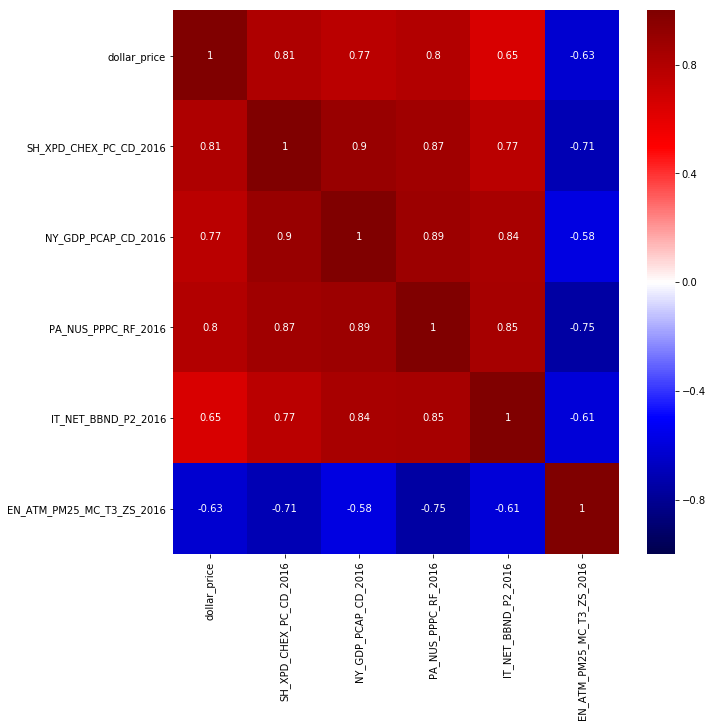

In [362]:
plt.figure(figsize = (10,10))
sns.heatmap(bmi_2016.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

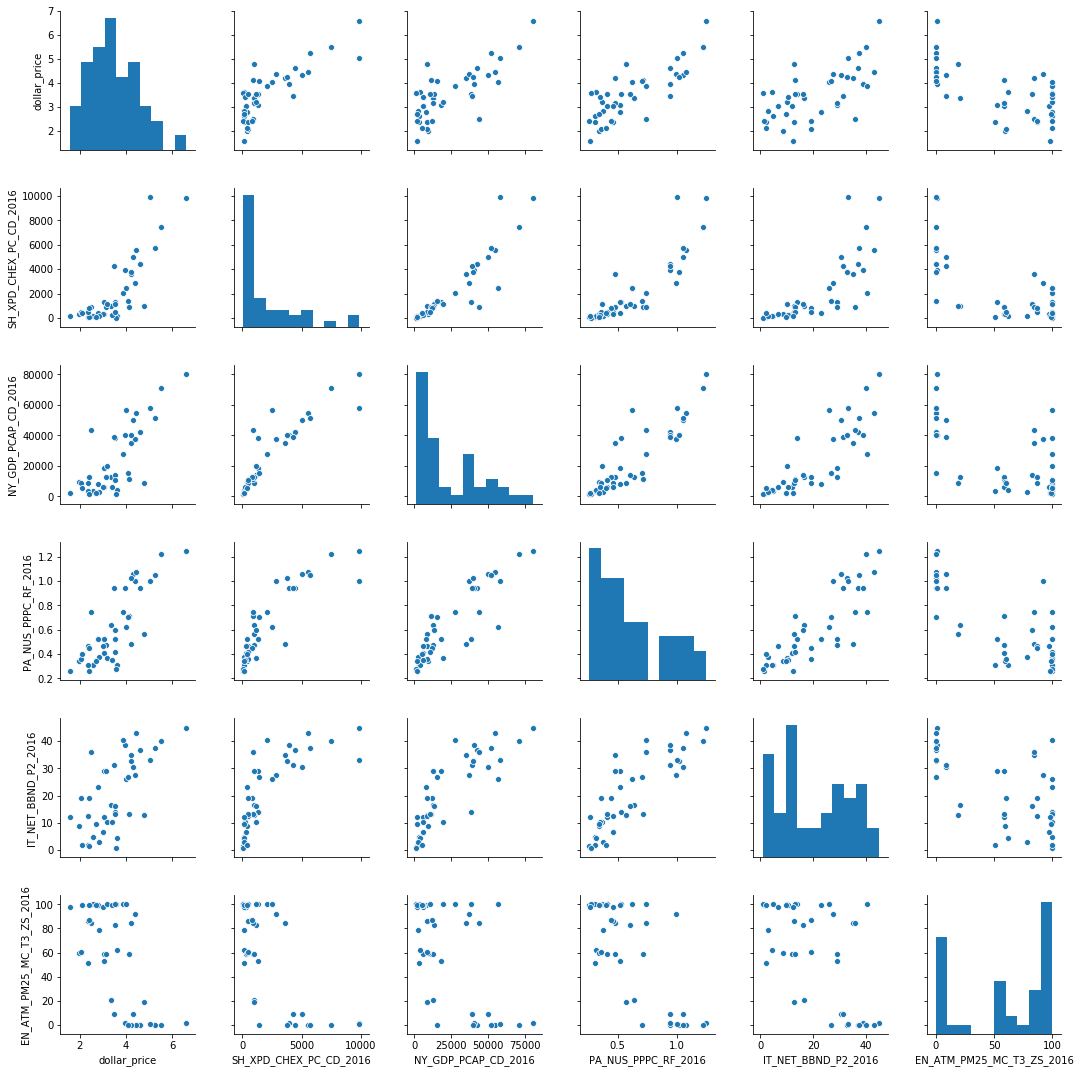

In [363]:
sns.pairplot(bmi_2016)

In [364]:
patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + IT_NET_BBND_P2_2016 + EN_ATM_PM25_MC_T3_ZS_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     17.25
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.08e-08
Time:                        16:27:38   Log-Likelihood:                -35.753
No. Observations:                  42   AIC:                             83.51
Df Residuals:                      36   BIC:                             93.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.2965      0.580      3.960      0.000       1.120       3.473
NY_GDP_PCAP_CD_2016        2.761e-06   1.41e-05      0.196      0.846   -2.59e-05    3.14e-05
PA_NUS_PPPC_RF_2016           1.7017      0.956      1.779      0.084      -0.238       3.641
SH_XPD_CHEX_PC_CD_2016        0.0002      0.000      1.904      0.065   -1.26e-05       0.000
IT_NET_BBND_P2_2016          -0.0134      0.015     -0.914      0.367      -0.043       0.016
EN_ATM_PM25_MC_T3_ZS_2016    -0.0004      0.004     -0.101      0.920      -0.009       0.008
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.462
Skew:                           0.168   Prob(JB):                        0.794
Kurtosis:                       2.611   Cond. No.                     3.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [365]:
print(fit.mse_resid, np.sqrt(fit.mse_resid))

0.37485293641615086 0.6122523470074662


In [366]:
# Here we see large P values for GDP per Capita, Broadband Subscriptions, and Air Pollution
# Large P values are likely due to the number of features vs number of observations
# Lets drop air pollution and re-run

In [368]:

patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + IT_NET_BBND_P2_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     22.15
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.13e-09
Time:                        16:44:45   Log-Likelihood:                -35.759
No. Observations:                  42   AIC:                             81.52
Df Residuals:                      37   BIC:                             90.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2465      0.300      7.489      0.000       1.639       2.854
NY_GDP_PCAP_CD_2016     2.127e-06   1.25e-05      0.170      0.866   -2.32e-05    2.74e-05
PA_NUS_PPPC_RF_2016        1.7492      0.822      2.128      0.040       0.084       3.415
SH_XPD_CHEX_PC_CD_2016     0.0002   9.21e-05      2.159      0.037    1.22e-05       0.000
IT_NET_BBND_P2_2016       -0.0133      0.014     -0.922      0.363      -0.042       0.016
==============================================================================
Omnibus:                        0.322   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.446
Skew:                           0.182   Prob(JB):                        0.800
Kurtosis:                       2.651   Cond. No.                     2.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
print(fit.mse_resid, np.sqrt(fit.mse_resid))

0.36482552405130464 0.6040078840969749


In [370]:
# P value for GDP still very high. Lets drop that too!

In [371]:
patsy_string = 'dollar_price ~ PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + IT_NET_BBND_P2_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=bmi_2016, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     30.30
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.55e-10
Time:                        16:47:45   Log-Likelihood:                -35.775
No. Observations:                  42   AIC:                             79.55
Df Residuals:                      38   BIC:                             86.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2380      0.292      7.664      0.000       1.647       2.829
PA_NUS_PPPC_RF_2016        1.7831      0.787      2.265      0.029       0.189       3.377
SH_XPD_CHEX_PC_CD_2016     0.0002   7.41e-05      2.809      0.008    5.81e-05       0.000
IT_NET_BBND_P2_2016       -0.0124      0.013     -0.935      0.356      -0.039       0.014
==============================================================================
Omnibus:                        0.333   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.481
Skew:                           0.174   Prob(JB):                        0.786
Kurtosis:                       2.607   Cond. No.                     2.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
print(fit.mse_resid, np.sqrt(fit.mse_resid))

0.3555037351427089 0.5962413396794195


### Part 10

Let's try to recreate the above models but use the 2019 BMI as the target. I'll have to use 2016 data for the features because the world bank data is not well populated for 2019, 2018, or 2017

In [408]:
latest_bmi = bm_full_index[bm_full_index['date'] == bm_full_index['date'][1273]]

# Drop Taiwan for now since we don't have worldbank data

latest_bmi.drop(latest_bmi[latest_bmi['name'] == 'Taiwan'].index, inplace = True)
latest_bmi = latest_bmi.reset_index().drop('index', axis = 1)
latest_bmi = latest_bmi[bm_columns]

In [409]:
indicators = ['SH.XPD.CHEX.PC.CD', 'NY.GDP.PCAP.CD', 'PA.NUS.PPPC.RF', 'IT.NET.BBND.P2', 'EN.ATM.PM25.MC.T3.ZS']
years = ['2016']

indicator_df = pull_worldbank_data(indicators, years)
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
iso_a3                       55 non-null object
SH_XPD_CHEX_PC_CD_2016       54 non-null float64
NY_GDP_PCAP_CD_2016          55 non-null float64
PA_NUS_PPPC_RF_2016          54 non-null float64
IT_NET_BBND_P2_2016          55 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    53 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [410]:
indicator_df['PA_NUS_PPPC_RF_2016'].fillna(indicator_df['PA_NUS_PPPC_RF_2016'].median(), inplace = True)
indicator_df['SH_XPD_CHEX_PC_CD_2016'].fillna(indicator_df['SH_XPD_CHEX_PC_CD_2016'].median(), inplace = True)
indicator_df['EN_ATM_PM25_MC_T3_ZS_2016'].fillna(indicator_df['EN_ATM_PM25_MC_T3_ZS_2016'].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
iso_a3                       55 non-null object
SH_XPD_CHEX_PC_CD_2016       55 non-null float64
NY_GDP_PCAP_CD_2016          55 non-null float64
PA_NUS_PPPC_RF_2016          55 non-null float64
IT_NET_BBND_P2_2016          55 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    55 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [411]:
# Merge indicator_df

latest_bmi = latest_bmi.merge(indicator_df, how = 'left', on = 'iso_a3')

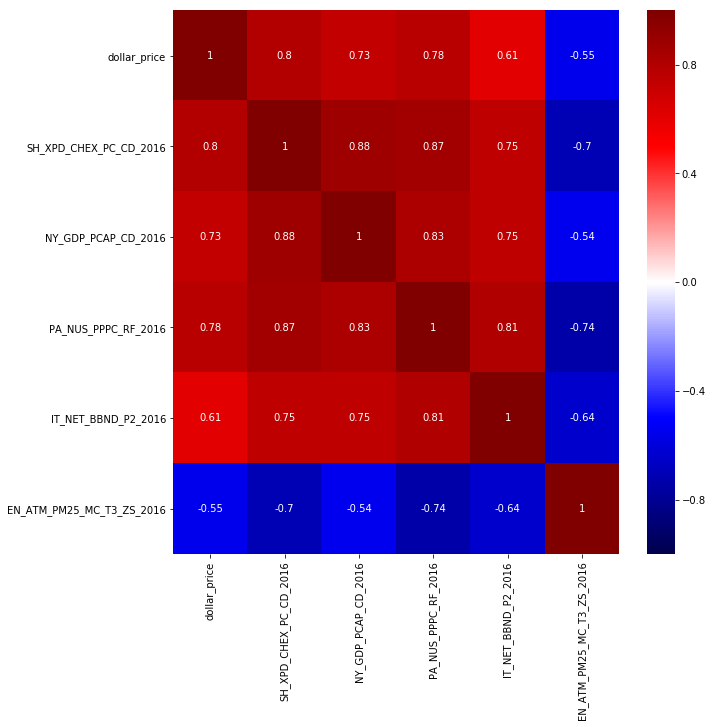

In [412]:
plt.figure(figsize = (10,10))
sns.heatmap(latest_bmi.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [439]:
# Largest patsy string: NY_GDP_PCAP_CD_2016 + PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + IT_NET_BBND_P2_2016 + EN_ATM_PM25_MC_T3_ZS_2016

patsy_string = 'dollar_price ~ PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + EN_ATM_PM25_MC_T3_ZS_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=latest_bmi, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.71e-12
Time:                        08:44:49   Log-Likelihood:                -45.857
No. Observations:                  55   AIC:                             99.71
Df Residuals:                      51   BIC:                             107.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.0776      0.440      4.721      0.000       1.194       2.961
PA_NUS_PPPC_RF_2016           1.4874      0.627      2.373      0.021       0.229       2.746
SH_XPD_CHEX_PC_CD_2016        0.0002   6.85e-05      3.295      0.002    8.83e-05       0.000
EN_ATM_PM25_MC_T3_ZS_2016     0.0033      0.003      1.063      0.293      -0.003       0.010
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.173
Skew:                           0.254   Prob(JB):                        0.556
Kurtosis:                       2.497   Cond. No.                     2.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [426]:
latest_bmi['fitted_values'] = fit.fittedvalues
latest_bmi['residuals'] = fit.resid

In [435]:
abs(latest_bmi['residuals']).mean()

0.46251592174057077

### Part 11

Lets see if regularization can help to achieve better generalization. Lets try Lasso with some extra features and see which ones get killed.

Use features:

1. Current health expenditure per capita (SH_XPD_CHEX_PC_CD)
2. GDP per capita USD (NY_GDP_PCAP_CD)
3. Price level ratio of PPP conversion factor (PA_NUS_PPPC_RF)
4. Fixed broadband subscriptions, per 100 people (IT_NET_BBND_P2_2016)
5. PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (EN_ATM_PM25_MC_T3_ZS_2016)
6. Secure Internet servers (per 1 million people) (IT_NET_SECR_P6_2016)
7. Labor force participation rate for ages 15-24 (SL_TLF_ACTI_1524_ZS_2016)
8. Life expectancy at birth, total (years) (SP_DYN_LE00_IN_2016)

In [527]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [503]:
indicators = ['SH.XPD.CHEX.PC.CD', 'NY.GDP.PCAP.CD', 'PA.NUS.PPPC.RF', 'IT.NET.BBND.P2', 'EN.ATM.PM25.MC.T3.ZS',
              'IT.NET.SECR.P6', 'SL.TLF.ACTI.1524.ZS', 'SP.DYN.LE00.IN']
years = ['2016']


In [518]:
# Should have just made this function earlier lol

def pull_impute_merge(indicators, years):
    
    '''
    Pull data from the worldbank dataset, impute null values, then merge to the bmi dataframe
    '''
    
    indicator_df = pull_worldbank_data(indicators, years)
    
    for column in indicator_df.drop(columns = 'iso_a3').columns:
        indicator_df[column].fillna(indicator_df[column].median(), inplace = True)
        
    bmi = bm_full_index[bm_full_index['date'] == bm_full_index['date'][1273]][bm_columns]

    # Drop Taiwan for now since we don't have worldbank data

    bmi.drop(bmi[bmi['name'] == 'Taiwan'].index, inplace = True)
    bmi = bmi.reset_index().drop('index', axis = 1)

    # Merge indicator_df

    bmi = bmi.merge(indicator_df, how = 'left', on = 'iso_a3')
    
    return bmi

In [521]:
latest_bmi = pull_impute_merge(indicators, years)

latest_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 13 columns):
date                         55 non-null object
iso_a3                       55 non-null object
currency_code                55 non-null object
name                         55 non-null object
dollar_price                 55 non-null float64
SH_XPD_CHEX_PC_CD_2016       55 non-null float64
NY_GDP_PCAP_CD_2016          55 non-null float64
PA_NUS_PPPC_RF_2016          55 non-null float64
IT_NET_BBND_P2_2016          55 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    55 non-null float64
IT_NET_SECR_P6_2016          55 non-null float64
SL_TLF_ACTI_1524_ZS_2016     55 non-null float64
SP_DYN_LE00_IN_2016          55 non-null float64
dtypes: float64(9), object(4)
memory usage: 6.0+ KB


In [602]:
# First lets try to lasso regularization with some additional features

patsy_string = 'dollar_price ~ NY_GDP_PCAP_CD_2016 + PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016'
patsy_string += ' + IT_NET_BBND_P2_2016 + EN_ATM_PM25_MC_T3_ZS_2016 + IT_NET_SECR_P6_2016 + SL_TLF_ACTI_1524_ZS_2016 + SP_DYN_LE00_IN_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=latest_bmi, return_type="dataframe")

# Create a train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Scale the features so that regularization can be applied
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Create vector of alphas
alphavec = 10**np.linspace(-2,2,200)

# Run Lasso CV to determine best alpha
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)

/Users/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [603]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.028994228538828767

In [604]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('Intercept', 0.0),
 ('NY_GDP_PCAP_CD_2016', -0.0),
 ('PA_NUS_PPPC_RF_2016', 0.058552092990634394),
 ('SH_XPD_CHEX_PC_CD_2016', 0.5308330743096111),
 ('IT_NET_BBND_P2_2016', -0.06654690466093584),
 ('EN_ATM_PM25_MC_T3_ZS_2016', 0.0),
 ('IT_NET_SECR_P6_2016', -0.0),
 ('SL_TLF_ACTI_1524_ZS_2016', 0.0),
 ('SP_DYN_LE00_IN_2016', 0.32785013195213114)]

Here we can see that Lasso knocked out half of the features.

Keep:
1. Current health expenditure per capita (SH_XPD_CHEX_PC_CD)
2. Price level ratio of PPP conversion factor (PA_NUS_PPPC_RF)
3. Fixed broadband subscriptions, per 100 people (IT_NET_BBND_P2_2016)
4. Life expectancy at birth, total (years) (SP_DYN_LE00_IN_2016)

Lose:
1. GDP per capita USD (NY_GDP_PCAP_CD)
2. PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (EN_ATM_PM25_MC_T3_ZS_2016)
3. Secure Internet servers (per 1 million people) (IT_NET_SECR_P6_2016)
4. Labor force participation rate for ages 15-24 (SL_TLF_ACTI_1524_ZS_2016)

### Part 12

Retrain the model on all the trainig data then run the model on the test set to determine how well this model generalizes.

In [605]:
# Train the lasso model
lasso_model = Lasso(alpha = 0.028994228538828767)
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.028994228538828767, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [606]:
from sklearn.metrics import r2_score

In [607]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_test)
train_set_pred = lasso_model.predict(X_train)

print(r2_score(y_train, train_set_pred), r2_score(y_test, test_set_pred))

-2221766.2379839355 -3461678.633464229


In [608]:
# OK something is clearly WAYYYY off here! Need to use the scaled data LMAO!

In [609]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_test_scaled)
train_set_pred = lasso_model.predict(X_train_scaled)

# Not bad! Highest R2 yet for training data.
print(r2_score(y_train, train_set_pred), r2_score(y_test, test_set_pred))

0.7378071262131669 0.5550890958766919


In [610]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.05855209,  0.53083307, -0.0665469 ,
        0.        , -0.        ,  0.        ,  0.32785013])

### Part 13

Merge the training data, test data, and predictions back into the full BMI dataframe then export these files to csv so that they can be used in visualizations

In [564]:
full_train = latest_bmi.loc[list(X_train.index)]
full_test = latest_bmi.loc[list(X_test.index)]

In [567]:
full_train['predictions'] = train_set_pred
full_test['predictions'] = test_set_pred

In [569]:
# Export train and test dataframes for visualization

full_train.to_csv('data/full_train.csv')
full_test.to_csv('data/full_test.csv')

In [572]:
# Mean absolute error on the training set
np.mean(abs(full_train['dollar_price'] - full_train['predictions']))

0.39725480032445043

In [573]:
# Mean absolute error on the test set
np.mean(abs(full_test['dollar_price'] - full_test['predictions']))

0.6059609438182805

### Part 14

I've now downloaded data for all of the countries in the world (not just those tracked by the BMI). I want to determine which countries would have the hypothetically most / least expensive Big Macs.

In [580]:
# Create list of files that I want to pull

file_list = []

for root, dirs, files in os.walk('more_data/'):
    for file in files:
        if file[0:3] == 'API':
            file_list.append(file)

In [581]:
more_worldbank_data = {}

for file in file_list:
    iso3 = file[4:7]
    directory = file.split('.')[0]
    path = 'more_data/' + directory + '/' + file
    df = pd.read_csv(path, header = 2)
    more_worldbank_data[iso3] = df

In [582]:
more_worldbank_data.keys()

dict_keys(['BLR', 'GHA', 'DOM', 'SLV', 'KHM', 'MAR', 'CYP', 'COM', 'KEN', 'NGA', 'MAF', 'MAC', 'RWA', 'BWA', 'MMR', 'ATG', 'BFA', 'BEL', 'FRO', 'IRN', 'BGD', 'BDI', 'CPV', 'LBY', 'TLS', 'MLI', 'GNQ', 'LSO', 'DMA', 'PRT', 'UGA', 'BEN', 'TON', 'LTU', 'ERI', 'SLB', 'TTO', 'MKD', 'IMN', 'SUR', 'SVK', 'BLZ', 'KNA', 'GRC', 'CHI', 'TUV', 'GMB', 'EST', 'MUS', 'TUN', 'TKM', 'KGZ', 'UZB', 'SDN', 'JAM', 'LIE', 'MDV', 'MDG', 'BRB', 'PRY', 'AUT', 'DEU', 'GNB', 'ECU', 'TCD', 'MWI', 'ABW', 'NRU', 'COG', 'DZA', 'KIR', 'MCO', 'SOM', 'ALB', 'MNG', 'GEO', 'ISL', 'FIN', 'DJI', 'TGO', 'NCL', 'VIR', 'SSD', 'IRL', 'CMR', 'TJK', 'ZMB', 'GUM', 'SRB', 'STP', 'SWZ', 'BTN', 'NAM', 'AND', 'MRT', 'SVN', 'IRQ', 'LBR', 'CYM', 'LCA', 'VCT', 'NLD', 'BOL', 'GIB', 'FJI', 'BHS', 'ITA', 'GRD', 'LUX', 'PLW', 'KAZ', 'TCA', 'GAB', 'SLE', 'FSM', 'LAO', 'MNP', 'GUY', 'LVA', 'AGO', 'PAN', 'HTI', 'NPL', 'PRK', 'CUB', 'CIV', 'XKX', 'PNG', 'CUW', 'PRI', 'SEN', 'SXM', 'VGB', 'YEM', 'BRN', 'FRA', 'NER', 'COD', 'CAF', 'BGR', 'SYR', 'V

In [583]:
def pull_more_worldbank_data(indicators, years):
    
    '''
    Returns a dataframe where the first column is country iso_a3 abbreviations and
    additional columns corresponde to indicator codes and years. This dataframe can
    be merged easily with the big mac index data.  
    
    '''
    
    indicator_dict = defaultdict(list)
    
    for key, df in more_worldbank_data.items():
        indicator_dict['iso_a3'].append(key)
        for indicator in indicators:
            for year in years:
                col = indicator.replace('.', '_') + '_' + year
                value = df[df['Indicator Code'] == indicator][year].values[0]
                indicator_dict[col].append(value)
                
    indicator_df = pd.DataFrame(indicator_dict)
    return indicator_df

In [660]:
indicators = ['SH.XPD.CHEX.PC.CD', 'NY.GDP.PCAP.CD', 'PA.NUS.PPPC.RF', 'IT.NET.BBND.P2', 'EN.ATM.PM25.MC.T3.ZS',
              'IT.NET.SECR.P6', 'SL.TLF.ACTI.1524.ZS', 'SP.DYN.LE00.IN']
years = ['2016']

indicator_df = pull_more_worldbank_data(indicators, years)

In [661]:
# Some null values but not too bad

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
iso_a3                       162 non-null object
SH_XPD_CHEX_PC_CD_2016       131 non-null float64
NY_GDP_PCAP_CD_2016          149 non-null float64
PA_NUS_PPPC_RF_2016          135 non-null float64
IT_NET_BBND_P2_2016          142 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    140 non-null float64
IT_NET_SECR_P6_2016          158 non-null float64
SL_TLF_ACTI_1524_ZS_2016     132 non-null float64
SP_DYN_LE00_IN_2016          144 non-null float64
dtypes: float64(8), object(1)
memory usage: 11.5+ KB


In [662]:
# Impute the null values using median

for column in indicator_df.drop(columns = 'iso_a3'):
    indicator_df[column].fillna(indicator_df[column].median(), inplace = True)

indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
iso_a3                       162 non-null object
SH_XPD_CHEX_PC_CD_2016       162 non-null float64
NY_GDP_PCAP_CD_2016          162 non-null float64
PA_NUS_PPPC_RF_2016          162 non-null float64
IT_NET_BBND_P2_2016          162 non-null float64
EN_ATM_PM25_MC_T3_ZS_2016    162 non-null float64
IT_NET_SECR_P6_2016          162 non-null float64
SL_TLF_ACTI_1524_ZS_2016     162 non-null float64
SP_DYN_LE00_IN_2016          162 non-null float64
dtypes: float64(8), object(1)
memory usage: 11.5+ KB


In [663]:
# pull out features into feature_df, create an intercept column
feature_df = indicator_df.drop(columns = 'iso_a3')
feature_df['Intercept'] = 0

feature_df.head()
#scaled_features = scaler.transform(feature_df.values)

,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016,IT_NET_SECR_P6_2016,SL_TLF_ACTI_1524_ZS_2016,SP_DYN_LE00_IN_2016,Intercept
0,317.994191,5022.626643,0.277517,32.357757,90.091243,438.981748,47.807999,73.826829,0
1,67.508859,1931.389470,0.467010,0.307005,100.000000,96.938601,42.175999,62.742000,0
2,414.176580,6957.564507,0.445622,7.206011,29.256858,93.289476,45.147999,73.861000,0
3,293.872557,3800.122181,0.494420,6.230486,100.000000,52.075606,43.433998,73.512000,0
4,77.673682,1269.591257,0.339195,0.619456,99.982760,20.486743,71.165001,68.981000,0


In [664]:
# Need to re_order columns per the previous section for scaling and modeling, see below

# [('Intercept', 0.0),
#  ('NY_GDP_PCAP_CD_2016', -0.0),
#  ('PA_NUS_PPPC_RF_2016', 0.058552092990634394),
#  ('SH_XPD_CHEX_PC_CD_2016', 0.5308330743096111),
#  ('IT_NET_BBND_P2_2016', -0.06654690466093584),
#  ('EN_ATM_PM25_MC_T3_ZS_2016', 0.0),
#  ('IT_NET_SECR_P6_2016', -0.0),
#  ('SL_TLF_ACTI_1524_ZS_2016', 0.0),
#  ('SP_DYN_LE00_IN_2016', 0.32785013195213114)]


cols = list(X_train.columns) # This will give the column names in order per previous section
feature_df = feature_df[cols]

In [665]:
# Retrain the Lasso Model using all of the labeled data

X_all = np.concatenate((X_train_scaled, X_test_scaled))
y_all = pd.concat([y_train, y_test])

In [666]:
lasso_model = Lasso(alpha = 0.028994228538828767)
lasso_model.fit(X_all,y_all)

Lasso(alpha=0.028994228538828767, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [677]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.10448816,  0.49114653, -0.07397072,
        0.        , -0.        ,  0.06298135,  0.25389472])

In [678]:
# Previous coefficients, a bit different now but not too dissimilar.
# Interestingly it is not killing off Labor Force Participation Rate entirely

# array([ 0.        , -0.        ,  0.05855209,  0.53083307, -0.0665469 ,
#         0.        , -0.        ,  0.        ,  0.32785013])

In [667]:
# Now I can scale the data and make predictions

features_scaled = scaler.transform(feature_df.values) # scaler was fit in the previous section.
more_pred = lasso_model.predict(features_scaled) # lasso model was fit in the previous section.

In [681]:
train_pred = lasso_model.predict(X_all)
r2_score(y_all, train_pred)

0.7040126999816284

In [688]:
X_all[0]

array([ 0.        , -0.8330157 , -1.25265718, -0.62882097,  0.05977685,
        0.79335117, -0.57250665, -0.33357732, -0.92556649])

In [695]:
np.array([0,0,0,0,0,0,0,0,0]).reshape(9,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [697]:
baseline = lasso_model.predict(np.array([0,0,0,0,0,0,0,0,0]).reshape(1,-1))
baseline

array([3.50296003])

In [668]:
# put these predictions back into indicator_df to link predictions back to countries

indicator_df['predictions'] = more_pred
indicator_df.sort_values(by = 'predictions', ascending = False, inplace = True)

# Lets put this into a different variable name
world_predictions = indicator_df.copy()
world_predictions.head()

,iso_a3,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016,IT_NET_SECR_P6_2016,SL_TLF_ACTI_1524_ZS_2016,SP_DYN_LE00_IN_2016,predictions
76,ISL,5063.605832,61757.949306,1.174501,38.506169,0.000000,35663.712329,82.817001,82.204878,4.914897
108,LUX,6271.437588,101305.527723,0.964061,35.275911,0.000000,11473.950798,30.806000,82.685366,4.893876
60,AUT,4688.280204,45103.329815,0.873156,28.963043,8.649987,4449.980244,57.549999,81.641463,4.608222
101,NLD,4742.030274,46007.852921,0.896165,42.284456,0.042675,24130.794065,68.218002,81.560976,4.604486
83,IRL,4758.594315,63558.697926,0.896130,28.780630,0.000000,11743.441840,50.679001,81.704878,4.602908


### Part 15

Pull out countries from the Euro Area and put them into a separate dataframe

In [669]:
# Euro Area Countries per World Bank

euro_area = ['AUT', 'BEL', 'CYP', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'PRT', 'SVK', 'SVN', 'ESP']

In [670]:
world_predictions.set_index('iso_a3', inplace = True)
euro_area_predictions = world_predictions.loc[euro_area]

In [671]:
non_euro = list(set(world_predictions.index) - set(euro_area))
non_euro_predictions = world_predictions.loc[non_euro]

In [672]:
non_euro_predictions.sort_values(by = 'predictions', ascending = False, inplace = True)
euro_area_predictions.sort_values(by = 'predictions', ascending = False, inplace = True)

In [673]:
non_euro_predictions.head()

,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016,IT_NET_SECR_P6_2016,SL_TLF_ACTI_1524_ZS_2016,SP_DYN_LE00_IN_2016,predictions
iso_a3,,,,,,,,,
ISL,5063.605832,61757.949306,1.174501,38.506169,0.000000,35663.712329,82.817001,82.204878,4.914897
BHS,1835.228202,31325.294829,1.014994,21.409036,90.425927,1053.102286,55.491001,75.675000,3.723704
AND,3834.730581,37224.108916,0.445622,42.041381,0.000000,2833.227680,42.518499,71.665671,3.579250
MDV,1047.843932,9282.723553,0.660413,6.851803,0.000000,212.402185,53.778000,77.339000,3.563651
MAC,256.501845,73954.956765,0.701465,29.070335,99.982056,1111.227147,44.433998,83.849000,3.560425


In [674]:
euro_area_predictions.head()

,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016,IT_NET_SECR_P6_2016,SL_TLF_ACTI_1524_ZS_2016,SP_DYN_LE00_IN_2016,predictions
iso_a3,,,,,,,,,
LUX,6271.437588,101305.527723,0.964061,35.275911,0.000000,11473.950798,30.806000,82.685366,4.893876
AUT,4688.280204,45103.329815,0.873156,28.963043,8.649987,4449.980244,57.549999,81.641463,4.608222
NLD,4742.030274,46007.852921,0.896165,42.284456,0.042675,24130.794065,68.218002,81.560976,4.604486
IRL,4758.594315,63558.697926,0.896130,28.780630,0.000000,11743.441840,50.679001,81.704878,4.602908
DEU,4714.260873,42443.465070,0.850207,39.065041,6.804455,11624.960204,49.580002,80.990244,4.474509


In [675]:
# Export these dataframes to csv in order to load them into visualization notebook

non_euro_predictions.to_csv('data/non_euro_predictions.csv')
euro_area_predictions.to_csv('data/euro_area_predictions.csv')

### Part 16

Try to replicate the latest Lasso model in statsmodels so that I can produce summary table and determine significance of coefficients.

Apparently Lasso is not included in statsmodels. Lets just run a regular OLS on our four features to determine their significance.

In [721]:
latest_bmi.head()

,date,iso_a3,currency_code,name,dollar_price,SH_XPD_CHEX_PC_CD_2016,NY_GDP_PCAP_CD_2016,PA_NUS_PPPC_RF_2016,IT_NET_BBND_P2_2016,EN_ATM_PM25_MC_T3_ZS_2016,IT_NET_SECR_P6_2016,SL_TLF_ACTI_1524_ZS_2016,SP_DYN_LE00_IN_2016
0,2019-07-09,ARE,AED,United Arab Emirates,4.015627,1323.116803,38141.846759,0.526922,13.998267,100.000000,938.683770,50.808998,77.25600
1,2019-07-09,ARG,ARS,Argentina,2.870504,955.200949,12790.242473,0.635369,16.473321,20.701896,735.024765,38.408001,76.57700
2,2019-07-09,AUS,AUD,Australia,4.260105,5002.358277,50019.967768,1.056341,30.653414,9.220748,9810.215053,66.667000,82.44878
3,2019-07-09,AZE,AZN,Azerbaijan,2.328323,268.155865,3880.738731,0.222812,18.545936,100.000000,101.867099,39.870998,72.02600
4,2019-07-09,BHR,BHD,Bahrain,3.713528,1099.362291,22619.116672,0.479061,16.293483,100.000000,346.474343,44.888000,76.90000


In [722]:
# Looks like latest_bmi still has the data we need

In [725]:
patsy_string = 'dollar_price ~ PA_NUS_PPPC_RF_2016 + SH_XPD_CHEX_PC_CD_2016 + IT_NET_BBND_P2_2016 + SP_DYN_LE00_IN_2016 + SL_TLF_ACTI_1524_ZS_2016'

# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_string, data=latest_bmi, return_type="dataframe")

# Create model
model = sm.OLS(y, X)

# Fit model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     25.12
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.85e-12
Time:                        16:59:36   Log-Likelihood:                -41.824
No. Observations:                  55   AIC:                             95.65
Df Residuals:                      49   BIC:                             107.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.1111      1.989     -1.564      0.124      -7.108       0.886
PA_NUS_PPPC_RF_2016          0.6598      0.727      0.908      0.368      -0.800       2.120
SH_XPD_CHEX_PC_CD_2016       0.0003    6.7e-05      3.936      0.000       0.000       0.000
IT_NET_BBND_P2_2016         -0.0243      0.012     -2.036      0.047      -0.048      -0.000
SP_DYN_LE00_IN_2016          0.0797      0.029      2.751      0.008       0.021       0.138
SL_TLF_ACTI_1524_ZS_2016     0.0035      0.008      0.472      0.639      -0.012       0.019
==============================================================================
Omnibus:                        0.083   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.168
Skew:                           0.086   Prob(JB):                        0.920
Kurtosis:                       2.791   Cond. No.                     7.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part 17

Determine adj R2 for Lasso model on train and test sets. Need a function to do this.

In [741]:
full_train.shape

(44, 14)

In [742]:
SSE = np.sum((full_train['predictions'] - full_train['dollar_price']) ** 2)

SST = np.sum((full_train['dollar_price'] - full_train['dollar_price'].mean()) ** 2)

# I assume that parameters that lasso has set to 0 do not count here
dfe = 44 - 5 - 1
dft = 44 - 1

adj_R2_train = (1 - (SSE/dfe)/(SST/dft))
adj_R2_train

0.7033080638727942

In [743]:
SSE = np.sum((full_test['predictions'] - full_test['dollar_price']) ** 2)

SST = np.sum((full_test['dollar_price'] - full_test['dollar_price'].mean()) ** 2)

# I assume that parameters that lasso has set to 0 do not count here
dfe = 44 - 5 - 1
dft = 44 - 1

adj_R2_test = (1 - (SSE/dfe)/(SST/dft))
adj_R2_test

0.4965481874394144

In [759]:
# For the model retrained on all the data
# y_all, train_pred
ys = np.array(y_all)
ys = ys.reshape(55,)

SSE = np.sum((train_pred - ys) ** 2)

SST = np.sum((ys - np.mean(ys)) ** 2)

# I assume that parameters that lasso has set to 0 do not count here
dfe = 55 - 5 - 1
dft = 55 - 1

adj_R2_all = (1 - (SSE/dfe)/(SST/dft))
adj_R2_all

0.6738099142654681